In [1]:
from correctingagent.experiments import experiment_tracking
from correctingagent.util import database
import matplotlib.pyplot as plt
from seaborn import violinplot, boxplot
import numpy as np
import pandas

In [2]:
def plot_big_experiments_w_errorbars(list_of_experiments, labels, title='', fname='default.png', axes=None,
                         show_xlabel=True, show_ylabel=True, legend_font=12, **kwargs):
    for experiment, label, marker in zip(list_of_experiments, labels,['--', '-', '-.', ':']):  #::['_', 'x', '+', '|']):
        cumsum = experiment_tracking.get_cumsum(experiment)
        mean = np.mean(cumsum, axis=0)
        std = np.std(cumsum, axis=0)
        print(mean.shape)
        plt.plot(range(1, 51), mean, label=label, linestyle=marker, 
                     linewidth=20, alpha=0.7)
#         plt.errorbar(range(1, 51), mean, errorevery=4,
#                      yerr=std, label=label, linestyle=marker, 
#                      linewidth=20, alpha=0.7)  # marker=marker)
        plt.legend(fontsize=legend_font)

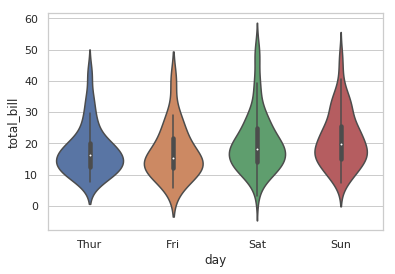

In [45]:
import seaborn as sns

sns.set(style="whitegrid")

tips = sns.load_dataset("tips")

ax = sns.violinplot(x="day", y="total_bill", data=tips)

In [46]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


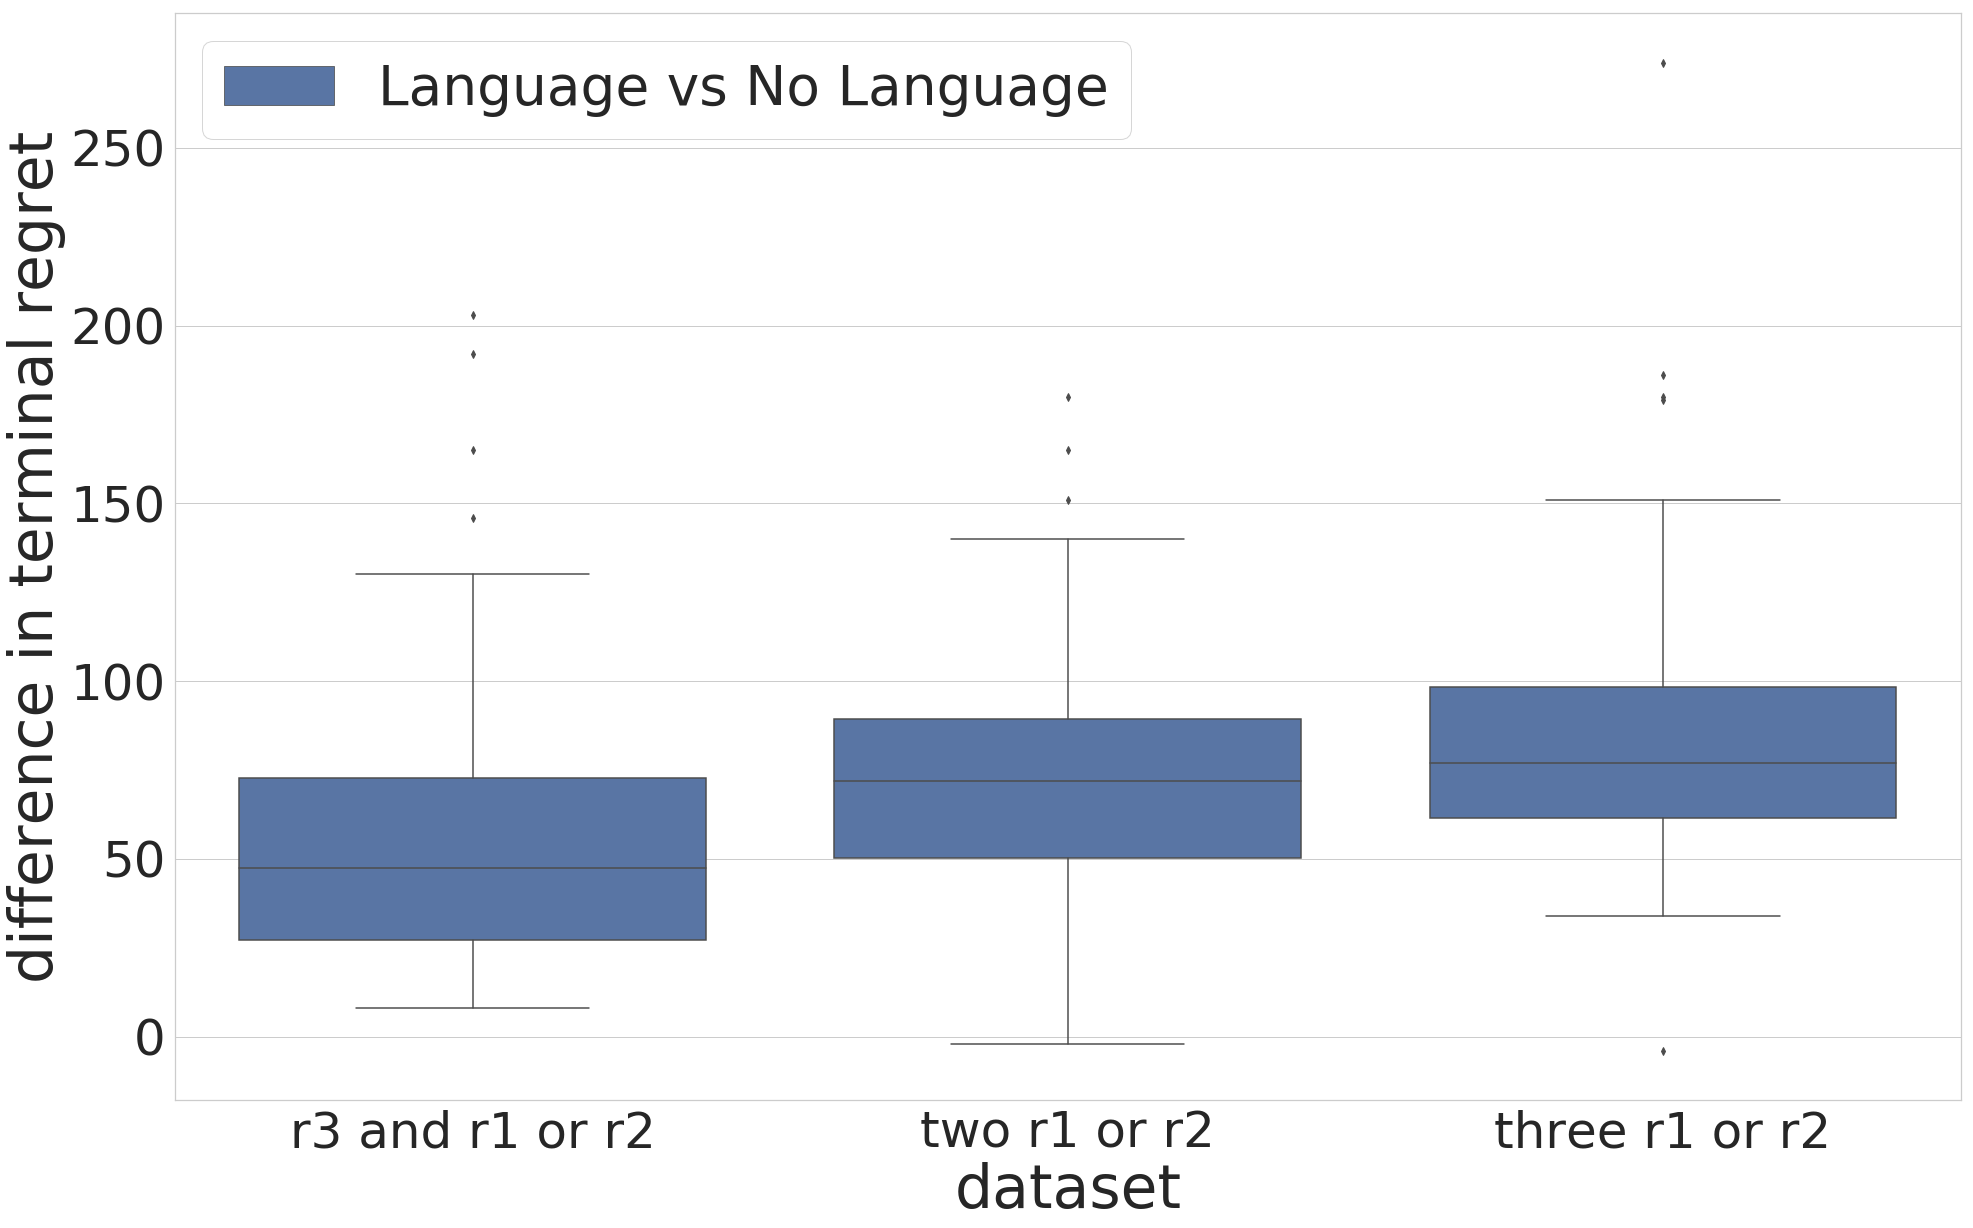

In [92]:
def do_bar_chart(comparators, comparator_label, list_of_experiments, labels, datasets, title='', fname='default.png', legend_pos = "upper left"):
    
    font_legend = 55
    title_font = 90
    label_font = 60
    ax_font = 50

    plt.figure(figsize=(32, 20))
    plt.tick_params(axis = 'both', which = 'major', labelsize = ax_font)
    
    plt.ylabel('terminal regret', fontsize=label_font)
    plt.xlabel('dataset', fontsize=label_font)
    plt.title(title, fontsize=title_font)
    
    
    
    data = pandas.DataFrame({"agent pair":[], "difference in terminal regret":[], "dataset":[]})
    for comparator, experiments, dataset in zip(comparators, list_of_experiments, datasets):
        cumsum1 = experiment_tracking.get_cumsum(comparator)[:, -1]
        
        for experiment, label in zip(experiments, labels):
            
            cumsum2 = experiment_tracking.get_cumsum(experiment)[:, -1]
            
            diff = cumsum2 - cumsum1
        
        
            for d in diff:
                data = data.append({"agent pair":f"{comparator_label} vs {label}", "difference in terminal regret":d, "dataset":dataset}, ignore_index=True)

    boxplot(x='dataset', y='difference in terminal regret', data=data, hue='agent pair')
    plt.legend(fontsize=font_legend, loc=legend_pos)
    plt.savefig(fname)
    plt.show()
    
                
do_bar_chart([357, 315, 339], 'Language', [[400], [319], [368]], ['No Language'], ["r3 and r1 or r2", "two r1 or r2", "three r1 or r2"], fname="boxplot.png")

In [58]:
big_db = database.BigExperimentDB()
df2 = big_db.get_df()
#df
df2# [df2.experiment_name == 'colour_count_mix_simpler_random']
#big_db.join_db.get_df()

,experiment_name,status
index,,
0,None,None
1,bigthreerules_test,running
2,bigthreerules_test,running
3,bigthreerules_test,running
4,bigthreerules_test,running
5,bigthreerules_test,running
6,bigthreerules_test,running
7,bigthreerules_test,running
8,bigthreerules_test,running


full vs simple
Min for a: 3.0 Max for a: 39.0
Min for b: 16.0 Max for b: 217.0
p= Ttest_relResult(statistic=-9.26705923210393, pvalue=2.3666635040888894e-12) mean a: 15.14 mean b: 75.06
Min for a: 16.0 Max for a: 217.0
Min for b: 84.0 Max for b: 313.0
p= Ttest_relResult(statistic=-18.21061226572369, pvalue=1.8658743866720796e-23) mean a: 75.06 mean b: 200.44


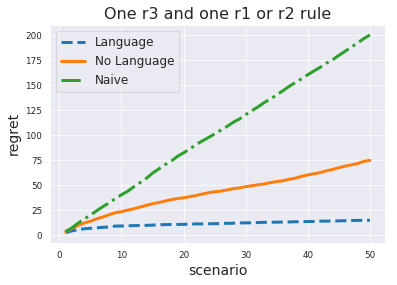

In [5]:
font_legend = 16
title_font = 16
label_font = 14
ax_font = 13
experiment_tracking.plot_big_experiments([357, 400, 232], ['Language', 'No Language', 'Naive'], fname='experiment1.png')
plt.ylabel('regret', fontsize=label_font)
plt.xlabel('scenario', fontsize=label_font)
plt.title('One r3 and one r1 or r2 rule', fontsize=title_font)
plt.savefig('experiment1-3.png')
print('full vs simple')
o = experiment_tracking.do_ttest_rel(357, 400)
o = experiment_tracking.do_ttest_rel(400, 232)

(50,)
(50,)
(50,)


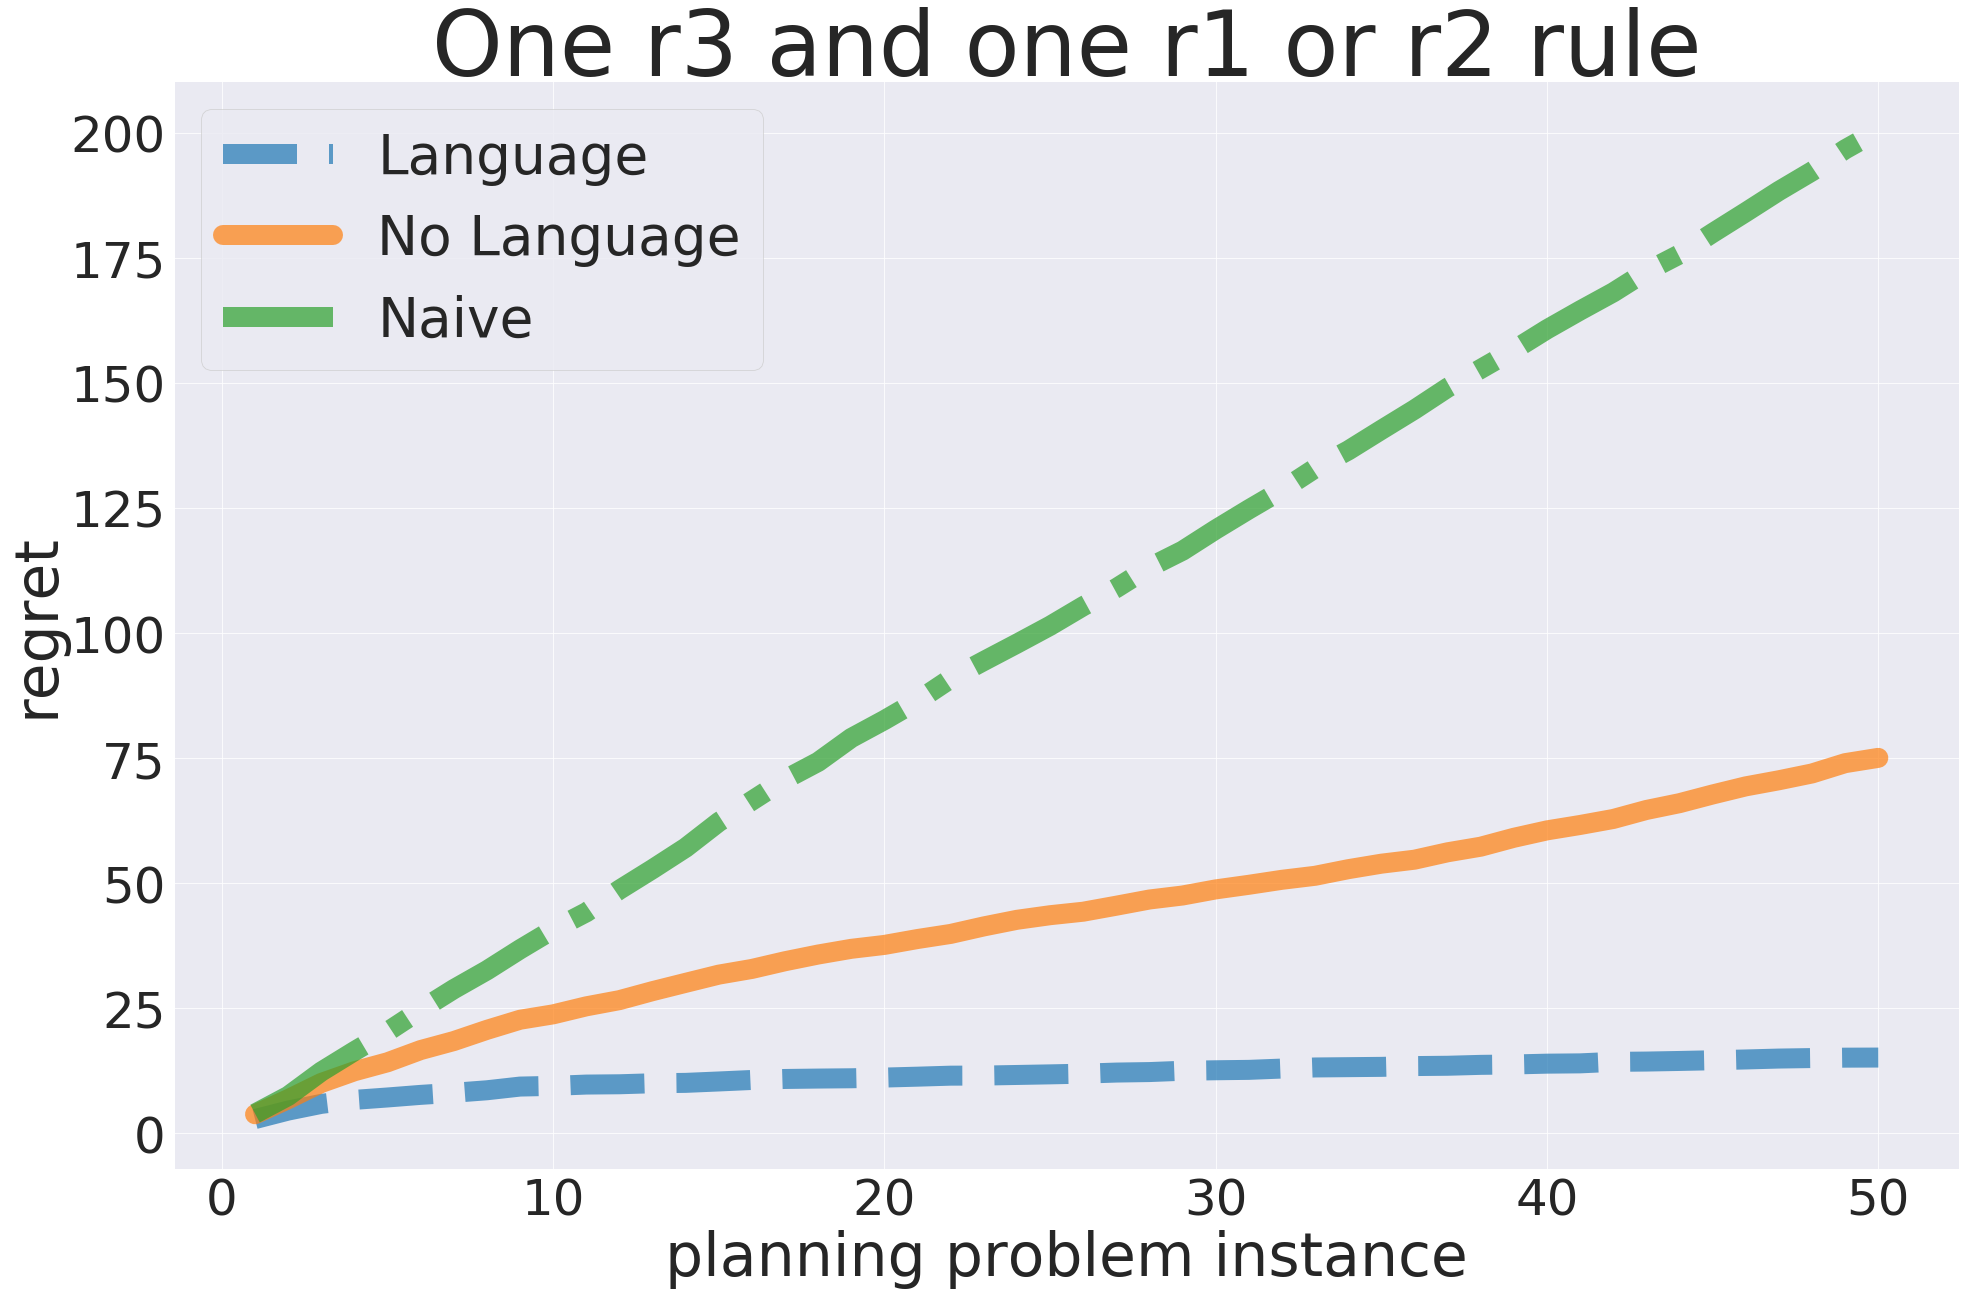

In [3]:
font_legend = 55
title_font = 90
label_font = 60
ax_font = 50

plt.figure(figsize=(32, 20))
plt.tick_params(axis = 'both', which = 'major', labelsize = ax_font)

plot_big_experiments_w_errorbars([357, 400, 232], ['Language', 'No Language', 'Naive'], fname='experiment1.png')
plt.ylabel('regret', fontsize=label_font)
plt.xlabel('planning problem instance', fontsize=label_font)
plt.title('One r3 and one r1 or r2 rule', fontsize=title_font)
plt.legend(fontsize=font_legend, loc='upper left')

plt.savefig('experiment1-3.png')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


(50,)
(50,)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


(50,)


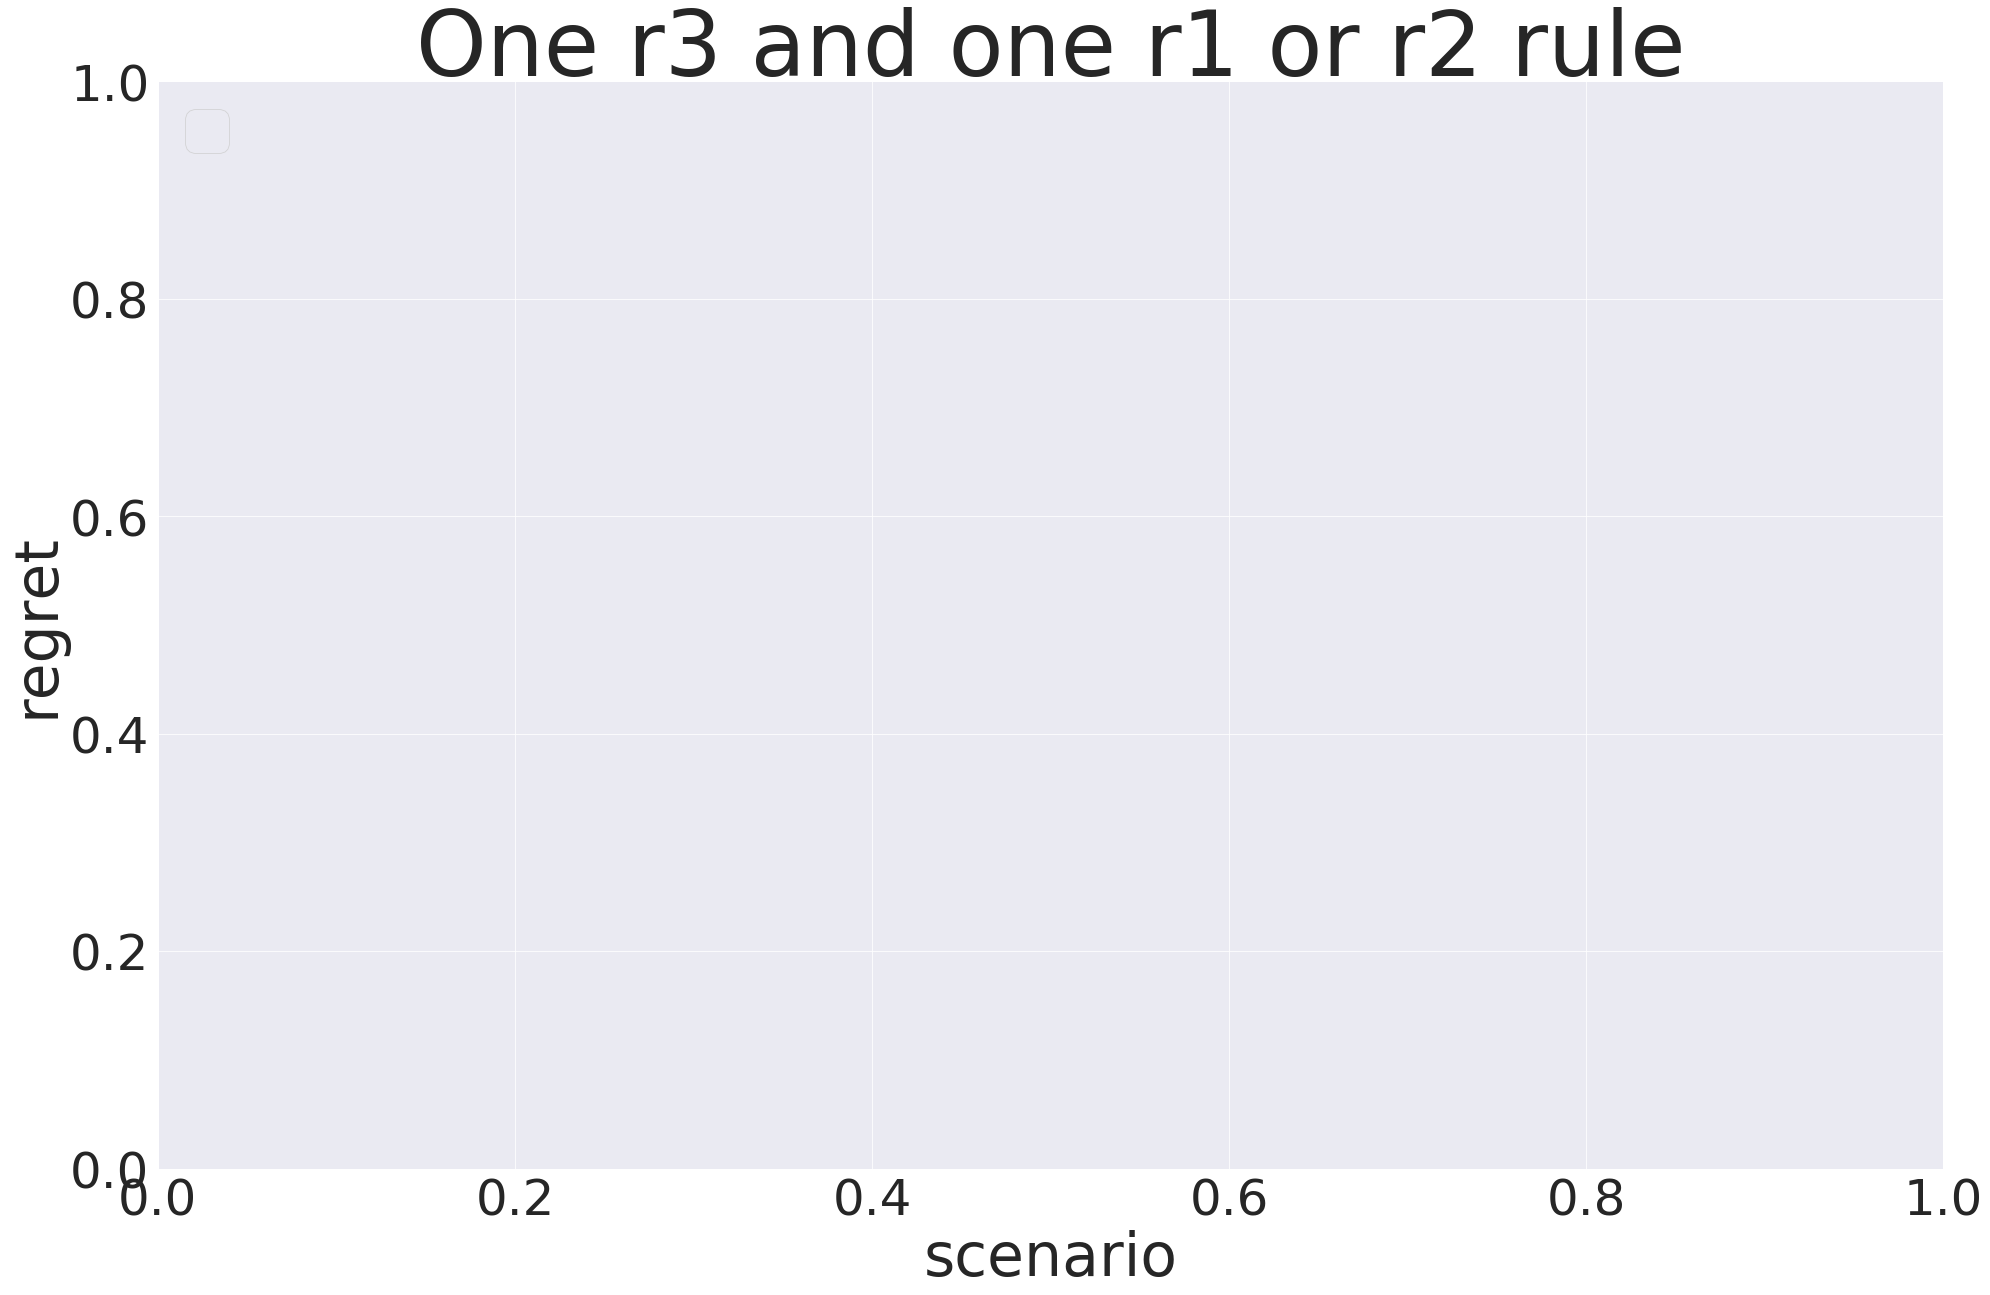

In [10]:
font_legend = 55
title_font = 90
label_font = 60
ax_font = 50

plt.figure(figsize=(32, 20))
plt.tick_params(axis = 'both', which = 'major', labelsize = ax_font)

plot_big_experiments_w_errorbars([357, 400, 232], ['Language', 'No Language', 'Naive'], fname='experiment1.png')
plt.ylabel('regret', fontsize=label_font)
plt.xlabel('scenario', fontsize=label_font)
plt.title('One r3 and one r1 or r2 rule', fontsize=title_font)
plt.legend(fontsize=font_legend, loc='upper left')

In [40]:
_ = do_ttest_rel_big([357, 315, 339], [400,319, 368])
_ = do_ttest_rel_big([400,319, 368], [232, 234, 275])

Min for a: 3.0 Max for a: 106.0
Min for b: 16.0 Max for b: 287.0
p= Ttest_relResult(statistic=-20.32386542517552, pvalue=8.395904510856808e-45) mean a: 25.69333333333333 mean b: 99.97333333333333
Min for a: 16.0 Max for a: 287.0
Min for b: 84.0 Max for b: 340.0
p= Ttest_relResult(statistic=-37.36962165289656, pvalue=1.4233119689029859e-77) mean a: 99.97333333333333 mean b: 241.76666666666668


full vs simple
Min for a: 9.0 Max for a: 77.0
Min for b: 40.0 Max for b: 198.0
p= Ttest_relResult(statistic=-13.944120808418115, pvalue=1.1080910300708046e-18) mean a: 23.68 mean b: 98.82
Min for a: 40.0 Max for a: 198.0
Min for b: 170.0 Max for b: 304.0
p= Ttest_relResult(statistic=-24.59034473863053, pvalue=3.192514993959403e-29) mean a: 98.82 mean b: 236.68


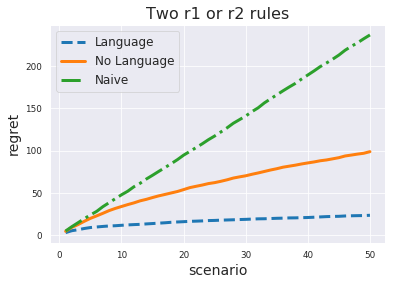

In [35]:

font_legend = 16
title_font = 16
label_font = 14
ax_font = 13
experiment_tracking.plot_big_experiments([315, 319, 234], ['Language', 'No Language', 'Naive'], fname='experiment1.png')
plt.ylabel('regret', fontsize=label_font)
plt.xlabel('scenario', fontsize=label_font)
plt.title('Two r1 or r2 rules', fontsize=title_font)
plt.savefig('experiment1.1.png')
print('full vs simple')
o = experiment_tracking.do_ttest_rel(315, 319)
o = experiment_tracking.do_ttest_rel(319, 234)

(50,)
(50,)
(50,)


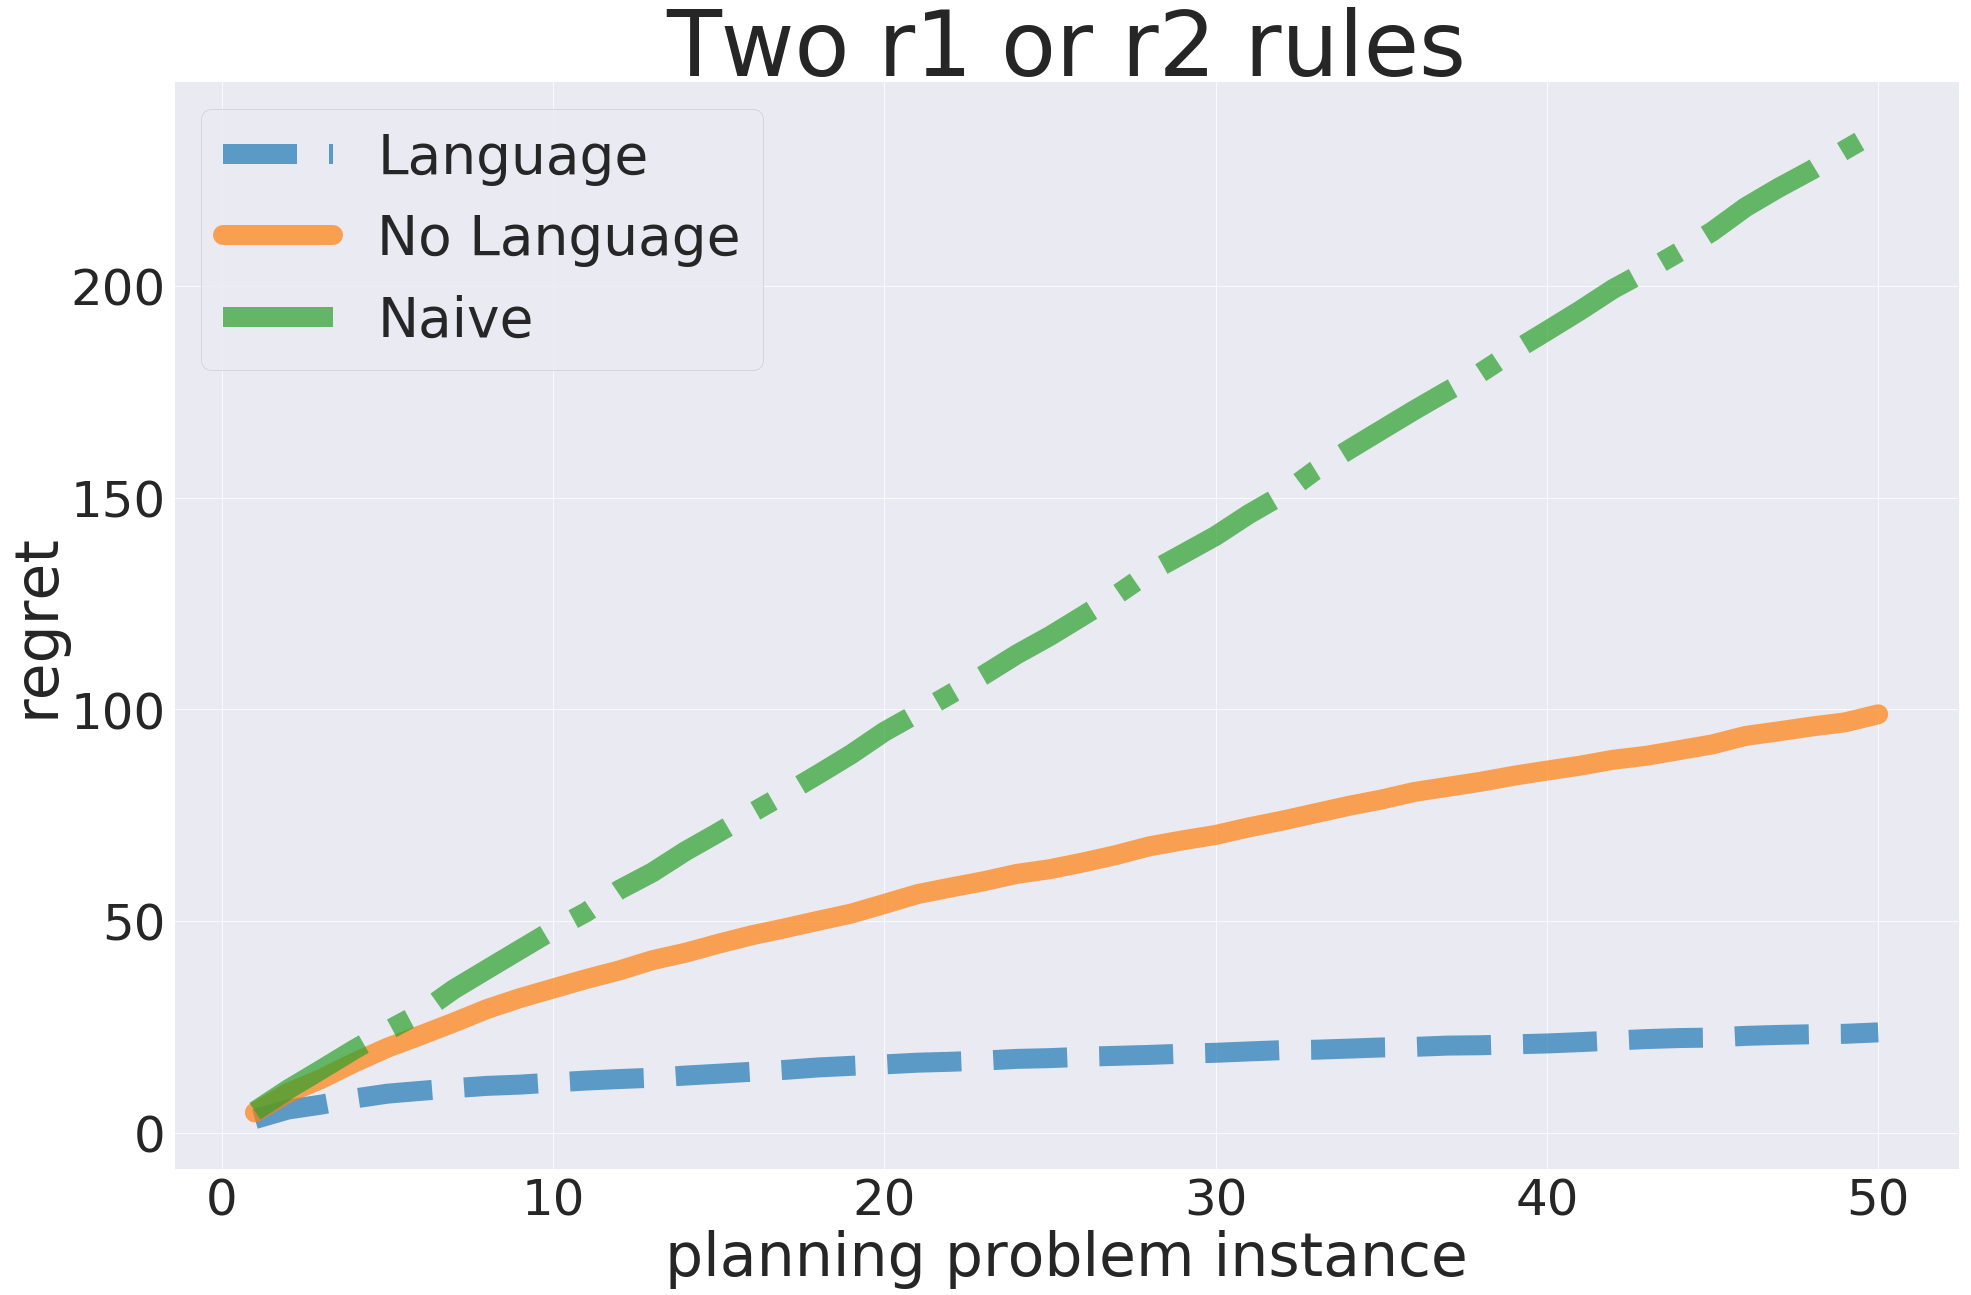

In [4]:

font_legend = 55
title_font = 90
label_font = 60
ax_font = 50

plt.figure(figsize=(32, 20))
plt.tick_params(axis = 'both', which = 'major', labelsize = ax_font)

plot_big_experiments_w_errorbars([315, 319, 234], ['Language', 'No Language', 'Naive'], fname='experiment1.png')
plt.ylabel('regret', fontsize=label_font)
plt.xlabel('planning problem instance', fontsize=label_font)

plt.legend(fontsize=font_legend, loc='upper left')

plt.title('Two r1 or r2 rules', fontsize=title_font)
plt.savefig('experiment1.1.png')

full vs simple
Min for a: 12.0 Max for a: 106.0
Min for b: 59.0 Max for b: 287.0
p= Ttest_relResult(statistic=-13.376007309173838, pvalue=5.612204283617839e-18) mean a: 38.26 mean b: 126.04
Min for a: 183.0 Max for a: 340.0
Min for b: 59.0 Max for b: 287.0
p= Ttest_relResult(statistic=26.21962916754635, pvalue=1.71195447750871e-30) mean a: 288.18 mean b: 126.04


(array([288., 308., 323., 252., 288., 296., 304., 311., 287., 291., 331.,
        325., 264., 273., 293., 257., 288., 273., 292., 276., 308., 298.,
        284., 265., 290., 210., 297., 254., 340., 268., 291., 293., 282.,
        317., 325., 183., 291., 279., 308., 298., 225., 286., 254., 296.,
        326., 289., 289., 319., 335., 289.]),
 array([106., 120., 143., 130.,  94.,  80., 118., 287.,  90.,  93.,  82.,
        121., 127., 154., 112.,  96., 126., 133., 176., 199., 133., 123.,
         95., 109., 106., 120., 111.,  78., 221., 115., 156., 158., 114.,
        179., 145.,  93., 114., 102., 131., 119.,  80., 103., 109., 115.,
         98., 167., 108., 219.,  59., 135.]))

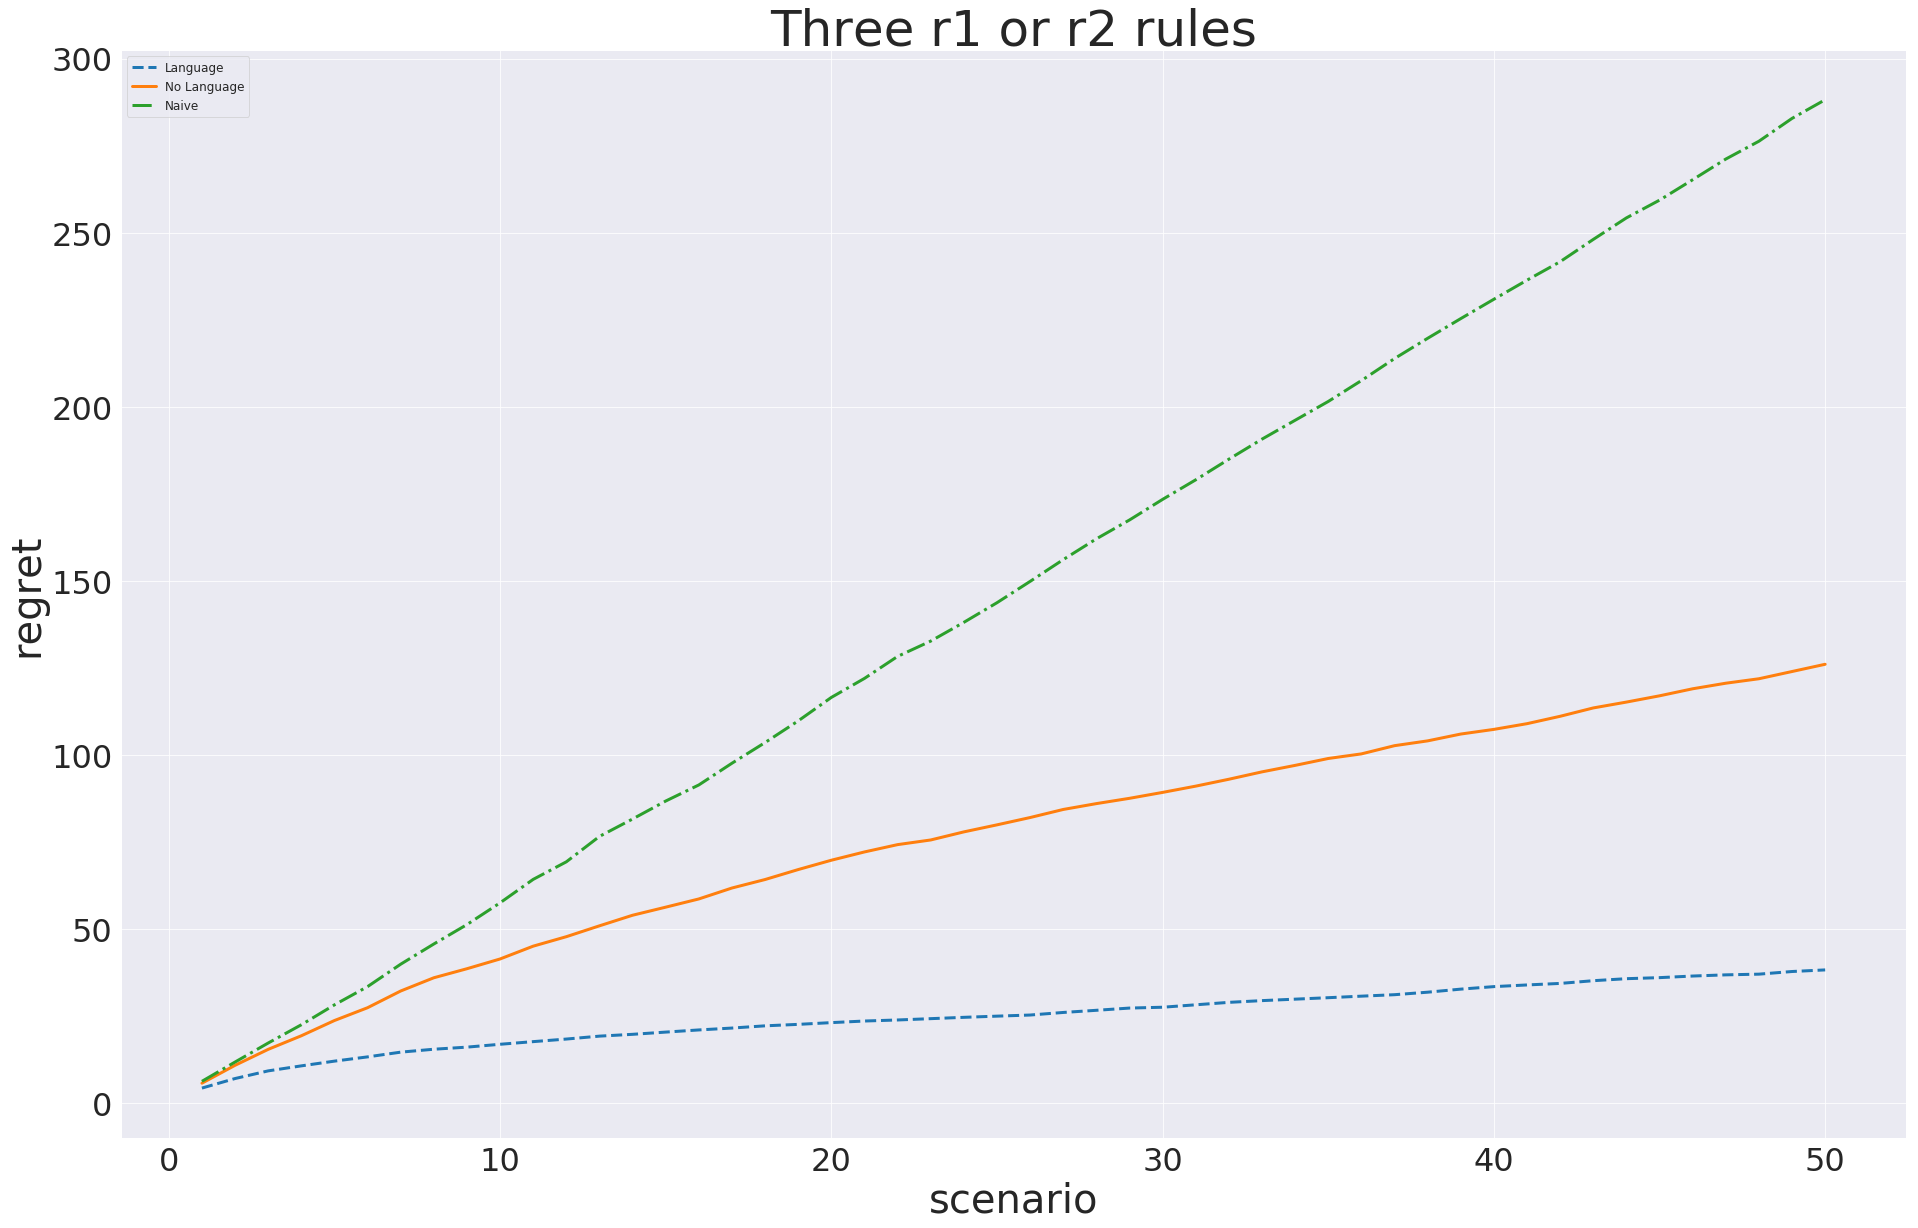

In [80]:

font_legend = 40
title_font = 50
label_font = 40
ax_font = 32

plt.figure(figsize=(32, 20))
plt.tick_params(axis = 'both', which = 'major', labelsize = ax_font)

experiment_tracking.plot_big_experiments([339, 368, 275], ['Language', 'No Language', 'Naive'], fname='experiment1.png')
plt.ylabel('regret', fontsize=label_font)
plt.xlabel('scenario', fontsize=label_font)
plt.title('Three r1 or r2 rules', fontsize=title_font)
plt.savefig('experiment1-2.png')
print('full vs simple')
experiment_tracking.do_ttest_rel(339, 368)
experiment_tracking.do_ttest_rel(275, 368)

(50,)
(50,)
(50,)


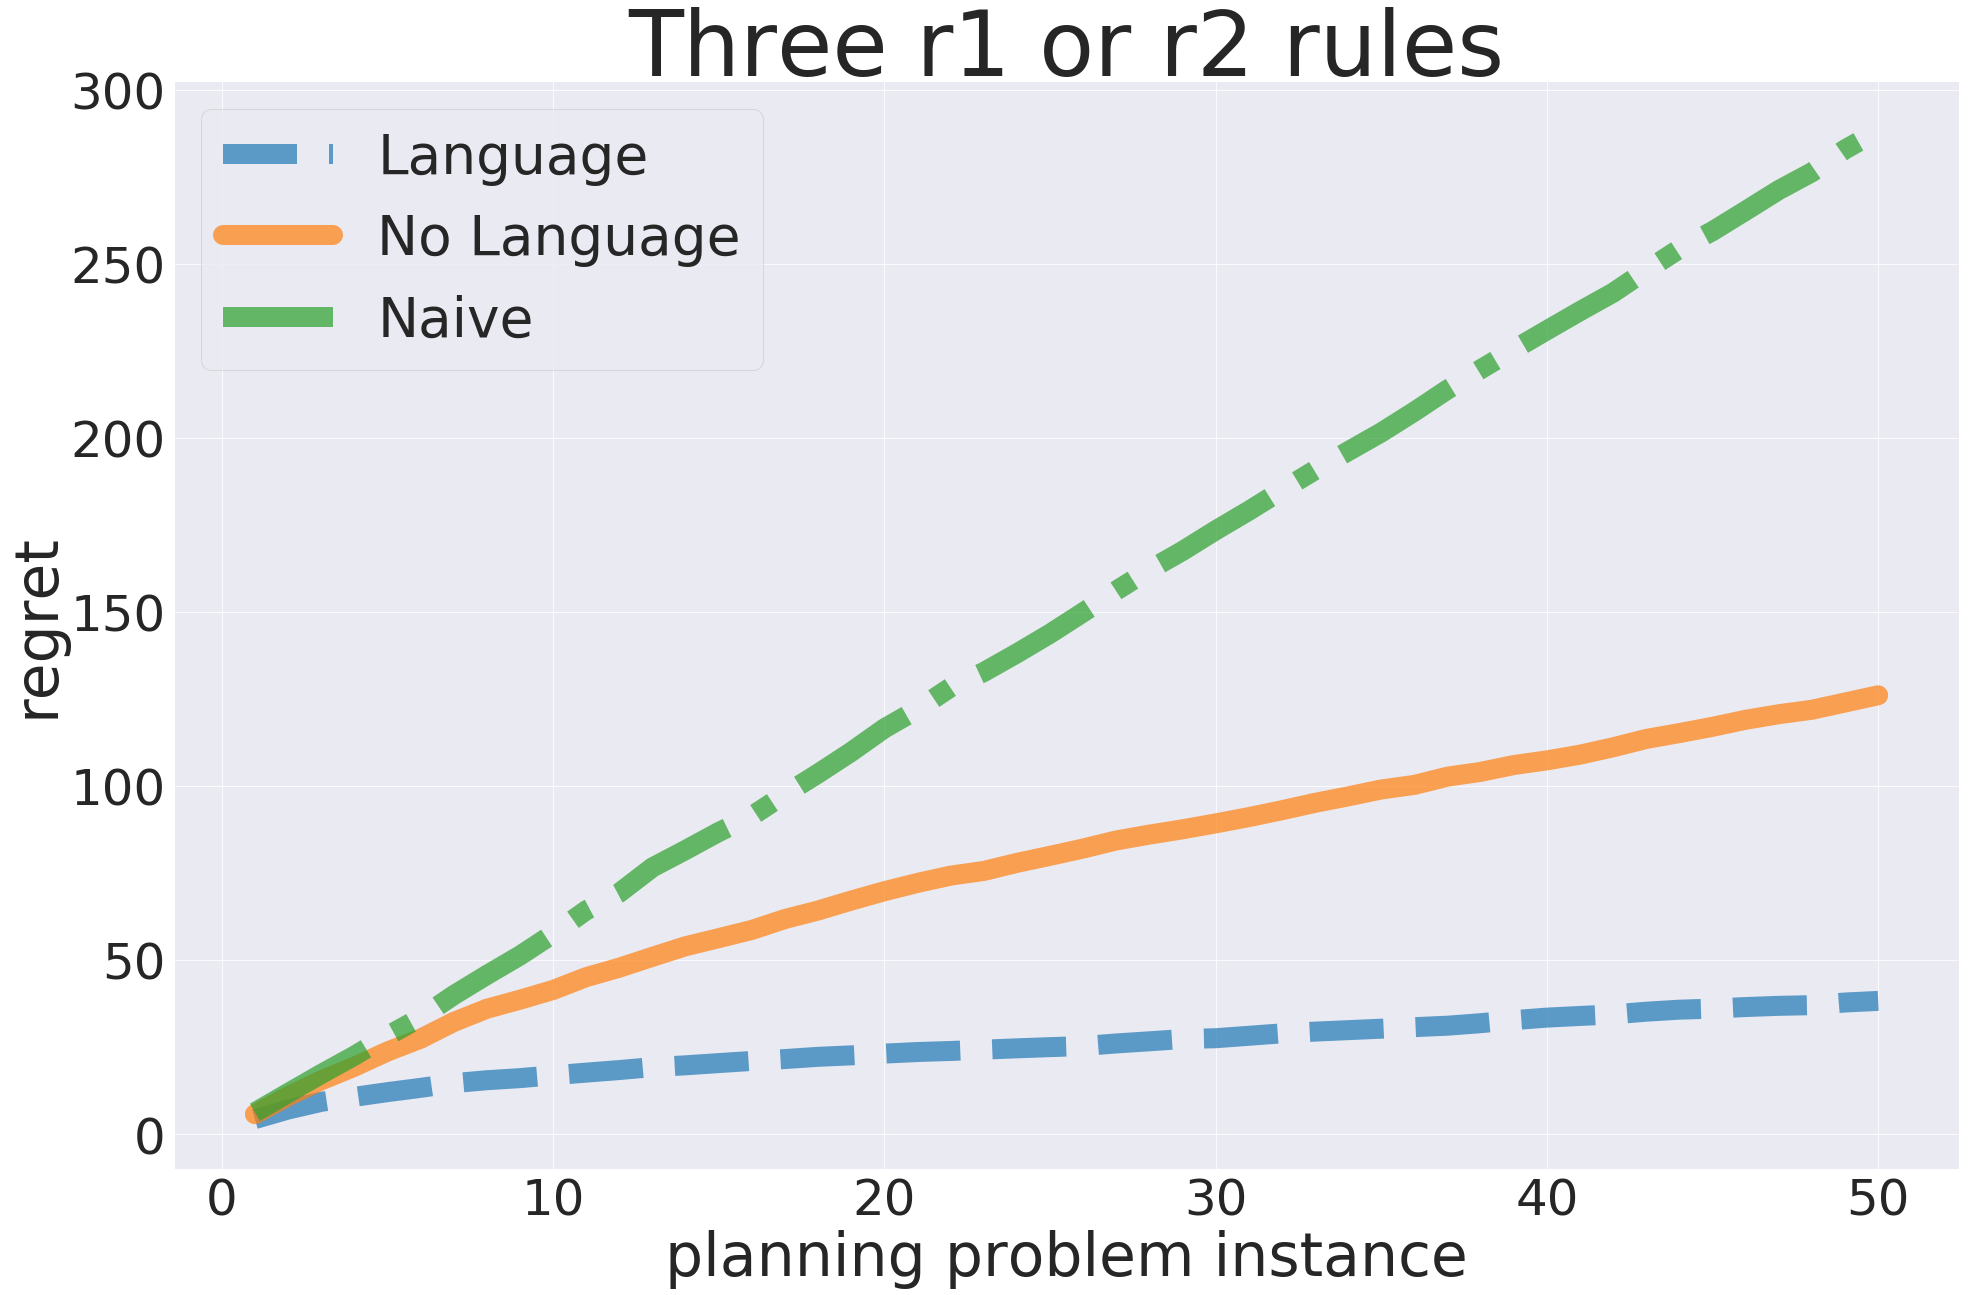

In [5]:
font_legend = 55
title_font = 90
label_font = 60
ax_font = 50

plt.figure(figsize=(32, 20))
plt.tick_params(axis = 'both', which = 'major', labelsize = ax_font)

plot_big_experiments_w_errorbars([339, 368, 275], ['Language', 'No Language', 'Naive'], fname='experiment1.png')
plt.ylabel('regret', fontsize=label_font)
plt.xlabel('planning problem instance', fontsize=label_font)

plt.legend(fontsize=font_legend, loc='upper left')

plt.title('Three r1 or r2 rules', fontsize=title_font)
plt.savefig('experiment1-2.png')

full vs simple
Min for a: 22.0 Max for a: 164.0
Min for b: 19.0 Max for b: 203.0
p= Ttest_relResult(statistic=2.3834465418656134, pvalue=0.02107139254202053) mean a: 66.44 mean b: 53.74


(array([ 41.,  60.,  51.,  44.,  26.,  74.,  76.,  68.,  36., 164.,  33.,
         77.,  56., 125.,  66.,  60.,  75.,  60.,  48.,  45.,  49.,  56.,
        140.,  37.,  75.,  28.,  47., 100.,  43.,  90.,  81.,  68.,  49.,
        140.,  58.,  29.,  37.,  52.,  78.,  33., 115.,  22.,  46.,  77.,
         93.,  52.,  56.,  42., 142., 102.]),
 array([ 40.,  52.,  38.,  21.,  36.,  59.,  65.,  45.,  45.,  74.,  50.,
         94.,  32., 120., 102.,  51.,  52.,  50.,  47.,  34.,  40.,  43.,
         47.,  65.,  44.,  41.,  39.,  68.,  32.,  76.,  57.,  32.,  43.,
         59.,  46.,  20., 203.,  44.,  65.,  38.,  47.,  19.,  62.,  36.,
         80.,  22.,  50.,  25.,  57.,  80.]))

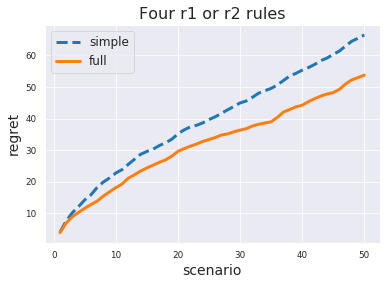

In [57]:
font_legend = 16
title_font = 16
label_font = 14
ax_font = 13
experiment_tracking.plot_big_experiments([352, 350], ['simple', 'full'], fname='experiment2.1.png')
plt.ylabel('regret', fontsize=label_font)
plt.xlabel('scenario', fontsize=label_font)
plt.title('Four r1 or r2 rules', fontsize=title_font)
plt.savefig('experiment2.3.png')
print('full vs simple')
experiment_tracking.do_ttest_rel(352, 350)

full vs simple
Min for a: 9.0 Max for a: 77.0
Min for b: 8.0 Max for b: 34.0
p= Ttest_relResult(statistic=3.9524901191385227, pvalue=0.0002482053136272668) mean a: 23.68 mean b: 16.34


(array([19., 22., 15., 15., 49., 36., 21., 17., 40., 18., 21., 28., 18.,
        16., 24., 19., 58., 11., 28., 19., 29., 39., 16., 19., 11., 38.,
        43., 15., 12., 15., 22., 31., 16., 33., 18., 14., 24., 23., 14.,
        12.,  9., 17., 16., 12., 46., 28., 77.,  9., 11., 21.]),
 array([21., 19., 16., 14., 32., 15., 18., 14., 24., 30., 18., 12., 12.,
        16., 20., 19., 15., 11., 16., 13., 12., 18.,  8., 20., 14., 14.,
        10.,  8., 12., 28., 17., 15., 10., 34., 19., 14., 14., 19., 13.,
        11., 11., 13.,  9., 18., 21., 21., 16.,  9., 14., 20.]))

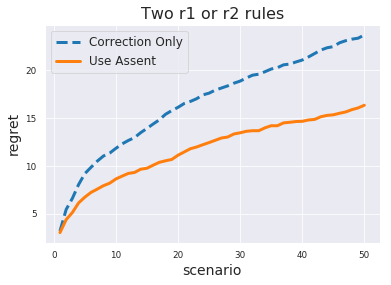

In [13]:
font_legend = 16
title_font = 16
label_font = 14
ax_font = 13
experiment_tracking.plot_big_experiments([315, 318], ['Correction Only', 'Use Assent'], fname='experiment2.1.png')
plt.ylabel('regret', fontsize=label_font)
plt.xlabel('scenario', fontsize=label_font)
plt.title('Two r1 or r2 rules', fontsize=title_font)
plt.savefig('experiment2.1.png')
print('full vs simple')
experiment_tracking.do_ttest_rel(315, 318)

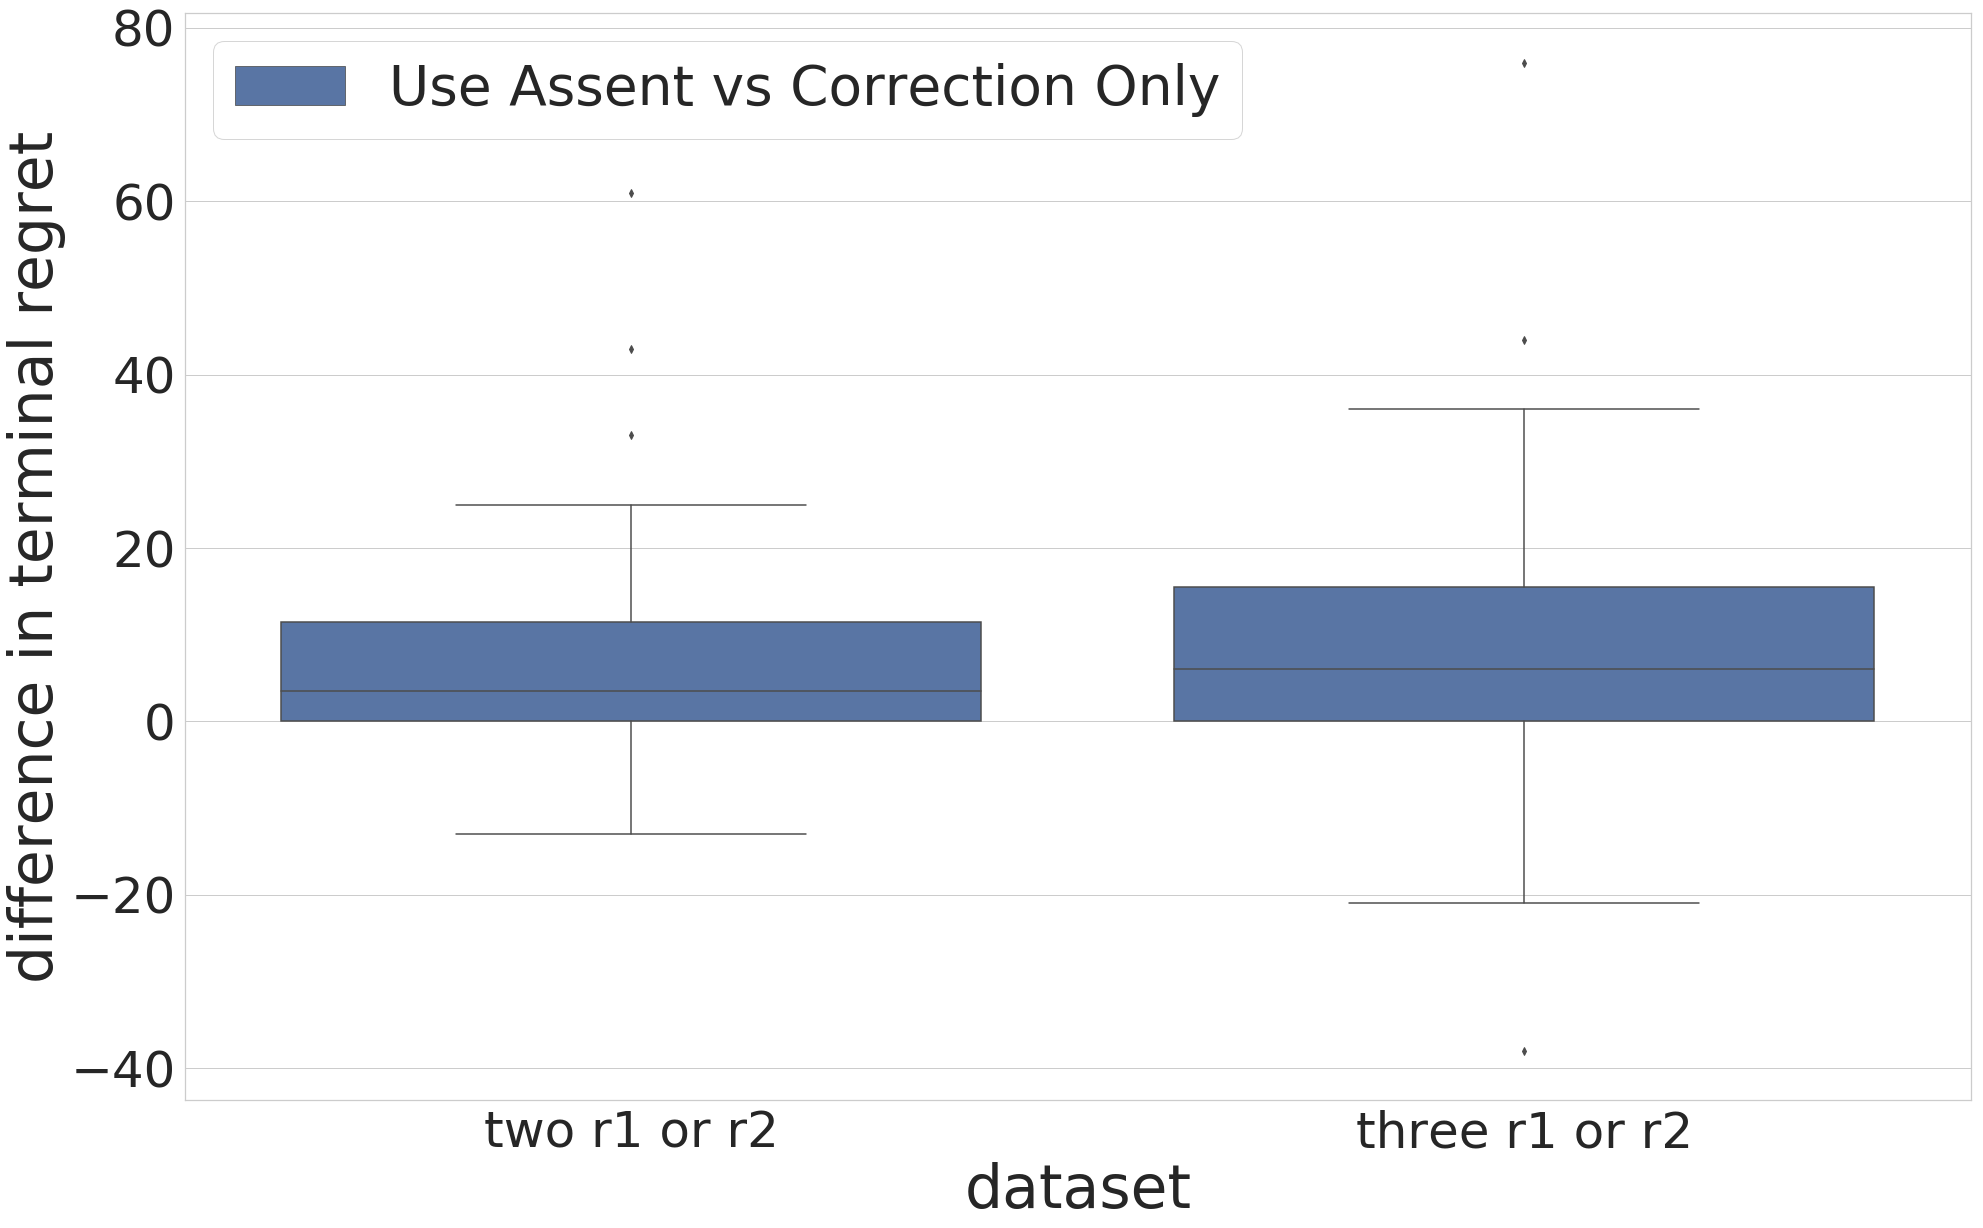

In [82]:

do_bar_chart([318, 340], 'Use Assent', [[315], [339]], ['Correction Only'], ["two r1 or r2", "three r1 or r2"], fname="boxplot2.png")

(50,)
(50,)
full vs simple


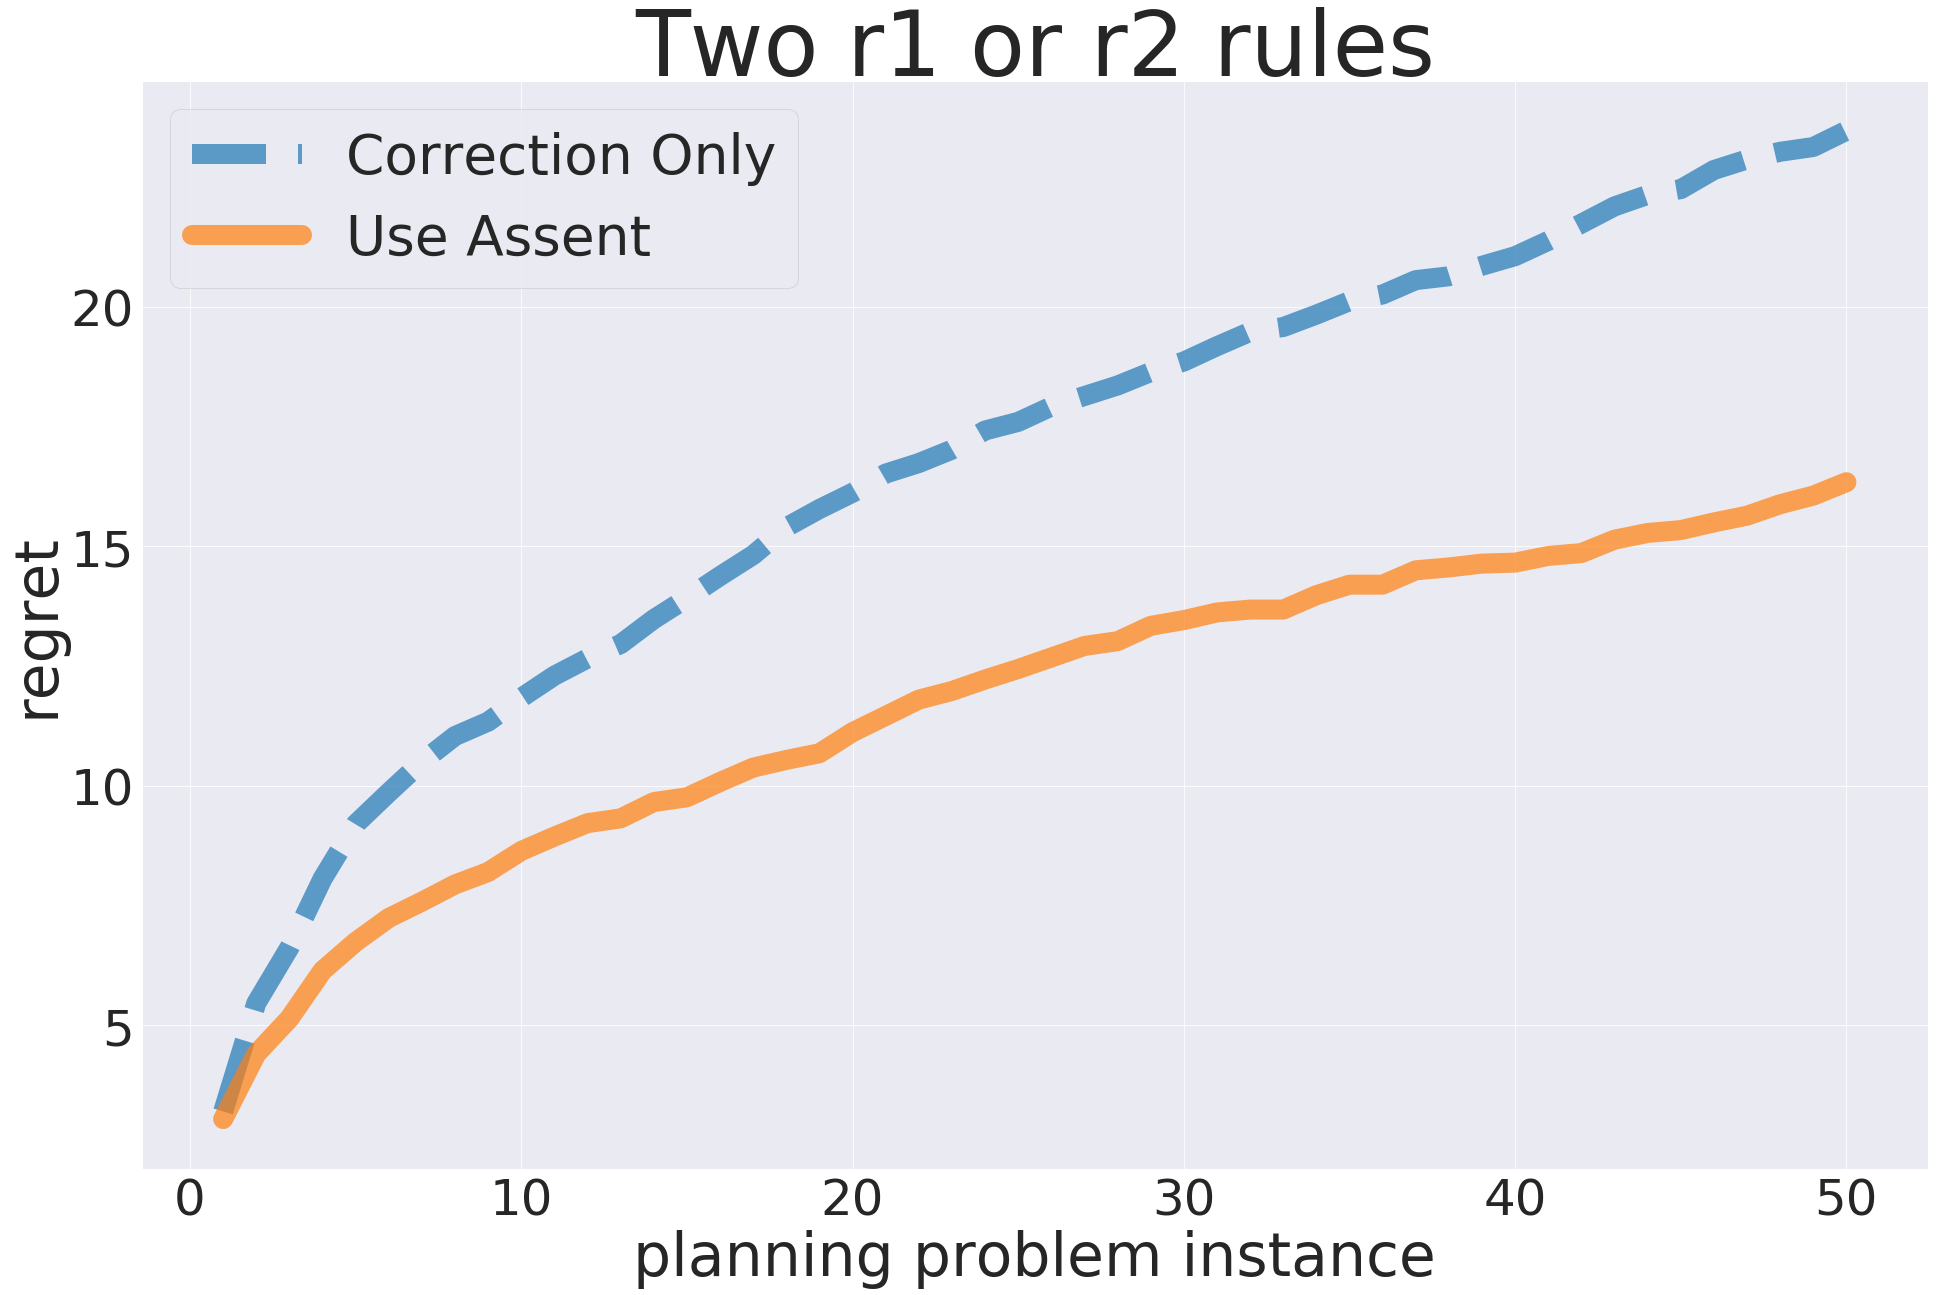

In [6]:
font_legend = 55
title_font = 90
label_font = 60
ax_font = 50

plt.figure(figsize=(32, 20))
plt.tick_params(axis = 'both', which = 'major', labelsize = ax_font)

plot_big_experiments_w_errorbars([315, 318], ['Correction Only', 'Use Assent'], fname='experiment2.1.png')
plt.ylabel('regret', fontsize=label_font)
plt.xlabel('planning problem instance', fontsize=label_font)

plt.title('Two r1 or r2 rules', fontsize=title_font)
plt.legend(fontsize=font_legend, loc='upper left')

plt.savefig('experiment2.1.png')
print('full vs simple')

full vs simple
Min for a: 9.0 Max for a: 77.0
Min for b: 8.0 Max for b: 34.0
p= Ttest_relResult(statistic=3.9524901191385227, pvalue=0.0002482053136272668) mean a: 23.68 mean b: 16.34


(array([19., 22., 15., 15., 49., 36., 21., 17., 40., 18., 21., 28., 18.,
        16., 24., 19., 58., 11., 28., 19., 29., 39., 16., 19., 11., 38.,
        43., 15., 12., 15., 22., 31., 16., 33., 18., 14., 24., 23., 14.,
        12.,  9., 17., 16., 12., 46., 28., 77.,  9., 11., 21.]),
 array([21., 19., 16., 14., 32., 15., 18., 14., 24., 30., 18., 12., 12.,
        16., 20., 19., 15., 11., 16., 13., 12., 18.,  8., 20., 14., 14.,
        10.,  8., 12., 28., 17., 15., 10., 34., 19., 14., 14., 19., 13.,
        11., 11., 13.,  9., 18., 21., 21., 16.,  9., 14., 20.]))

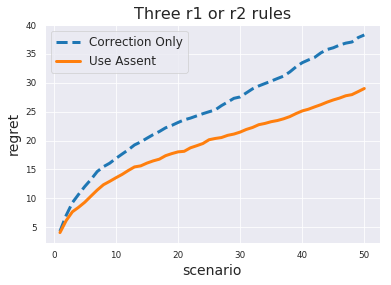

In [4]:
font_legend = 16
title_font = 16
label_font = 14
ax_font = 13
experiment_tracking.plot_big_experiments([339, 340], ['Correction Only', 'Use Assent'], fname='experiment2.2.png')
plt.ylabel('regret', fontsize=label_font)
plt.xlabel('scenario', fontsize=label_font)
plt.title('Three r1 or r2 rules', fontsize=title_font)
plt.savefig('experiment2.2.png')
print('full vs simple')
experiment_tracking.do_ttest_rel(315, 318)

(50,)
(50,)
full vs simple


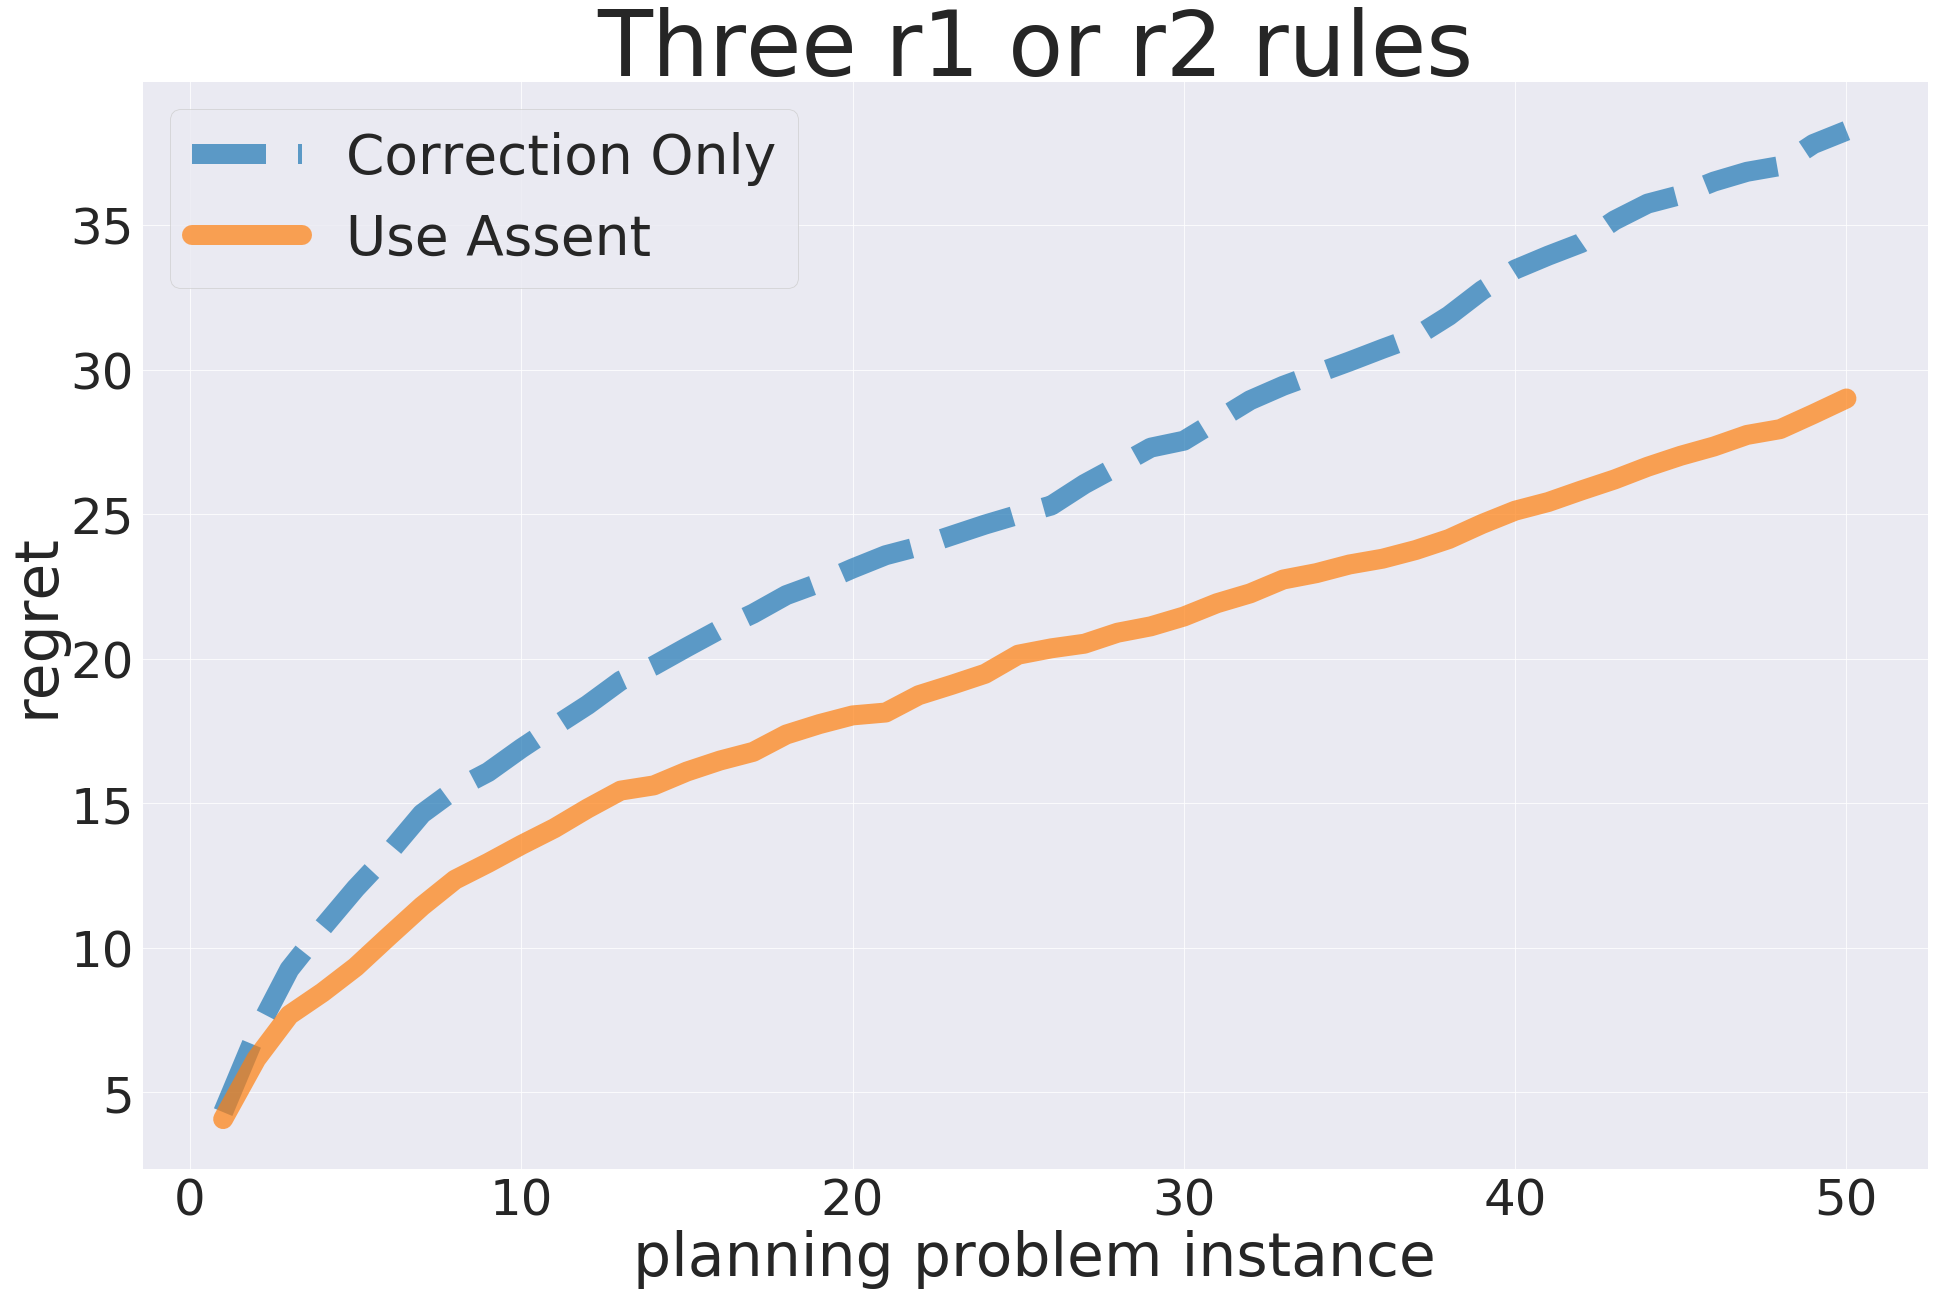

In [7]:
font_legend = 55
title_font = 90
label_font = 60
ax_font = 50

plt.figure(figsize=(32, 20))
plt.tick_params(axis = 'both', which = 'major', labelsize = ax_font)

plot_big_experiments_w_errorbars([339, 340], ['Correction Only', 'Use Assent'], fname='experiment2.2.png')
plt.ylabel('regret', fontsize=label_font)
plt.xlabel('planning problem instance', fontsize=label_font)

plt.title('Three r1 or r2 rules', fontsize=title_font)
plt.legend(fontsize=font_legend, loc='upper left')

plt.savefig('experiment2.2.png')
print('full vs simple')

simple vs simple + anaphor
Min for a: 6.0 Max for a: 36.0
Min for b: 4.0 Max for b: 40.0
p= Ttest_relResult(statistic=3.9469417632258836, pvalue=0.0002526001199881727) mean a: 17.72 mean b: 12.84
full vs full + anaphor
Min for a: 4.0 Max for a: 24.0
Min for b: 3.0 Max for b: 24.0
p= Ttest_relResult(statistic=2.783012987810618, pvalue=0.007628594269910338) mean a: 11.76 mean b: 10.36


(array([13., 14., 21., 14.,  8., 16., 10.,  8., 17., 19.,  8., 12.,  9.,
         9., 17., 12., 12., 12.,  9.,  9., 11., 12.,  9.,  4.,  8., 11.,
         6., 16., 16.,  6., 10., 19.,  6., 17., 11., 14.,  8.,  9.,  6.,
         8., 18.,  4., 24., 12., 18.,  8., 12., 12., 15.,  9.]),
 array([10., 10., 24., 19., 11., 16.,  9., 10.,  9., 16.,  7., 14.,  9.,
        13.,  7., 10.,  8., 12.,  5.,  9., 11.,  7.,  4.,  4.,  6.,  4.,
         5., 10., 12.,  6.,  9., 15.,  8.,  7., 12.,  8.,  7., 14.,  5.,
         8., 18.,  3., 24., 13., 17.,  5., 12., 17.,  9., 10.]))

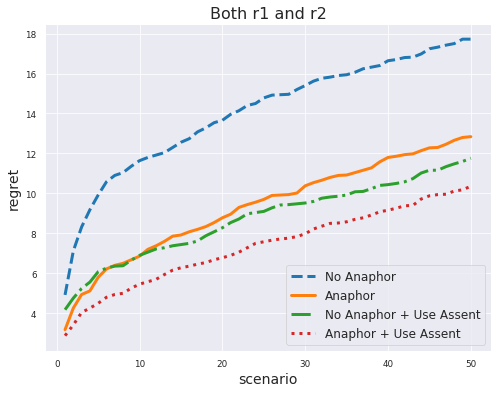

In [14]:
plt.figure(figsize=(8, 6))
experiment_tracking.plot_big_experiments(
    [363, 361, 364, 365], 
    ['No Anaphor', 'Anaphor', 'No Anaphor + Use Assent', 'Anaphor + Use Assent'], 
    fname='experiment3.png')
font_legend = 16
title_font = 16
label_font = 14
ax_font = 13
plt.ylabel('regret', fontsize=label_font)
plt.xlabel('scenario', fontsize=label_font)
plt.title('Both r1 and r2', fontsize=title_font)
plt.savefig('experiment3.4.png')
print('simple vs simple + anaphor')
experiment_tracking.do_ttest_rel(363, 361)
print('full vs full + anaphor')
experiment_tracking.do_ttest_rel(364, 365)

In [ ]:
do_bar_chart([318, 340], 'Use Assent', [[315], [339]], ['Correction Only'], ["two r1 or r2", "three r1 or r2"], fname="boxplot2.png")

In [96]:
def split_bar_chart(comparators, comparator_labels, list_of_experiments, labels, datasets, title='', fname='default.png'):
    
    font_legend = 55
    title_font = 90
    label_font = 60
    ax_font = 50

    plt.figure(figsize=(32, 20))
    plt.tick_params(axis = 'both', which = 'major', labelsize = ax_font)
    
    plt.ylabel('terminal regret', fontsize=label_font)
    plt.xlabel('dataset', fontsize=label_font)
    plt.title(title, fontsize=title_font)
    
    data = pandas.DataFrame({"agent pair":[], "difference in terminal regret":[], "dataset":[]})
    
    for dataset, experiments, comparator_exp in zip(datasets, list_of_experiments, comparators):
        for exp1, labl1, exp2, labl2, in zip(comparator_exp, comparator_labels, experiments, labels):
            
    
    
    
            cumsum1 = experiment_tracking.get_cumsum(exp1)[:, -1]
            
            cumsum2 = experiment_tracking.get_cumsum(exp2)[:, -1]
            
            diff = cumsum2 - cumsum1
        
        
            for d in diff:
                data = data.append({"agent pair":f"{labl1} vs {labl2}", "difference in terminal regret":d, "dataset":dataset}, ignore_index=True)

    boxplot(x='dataset', y='difference in terminal regret', data=data, hue='agent pair')
    plt.legend(fontsize=font_legend, loc='lower left')
    plt.savefig(fname)
    plt.show()

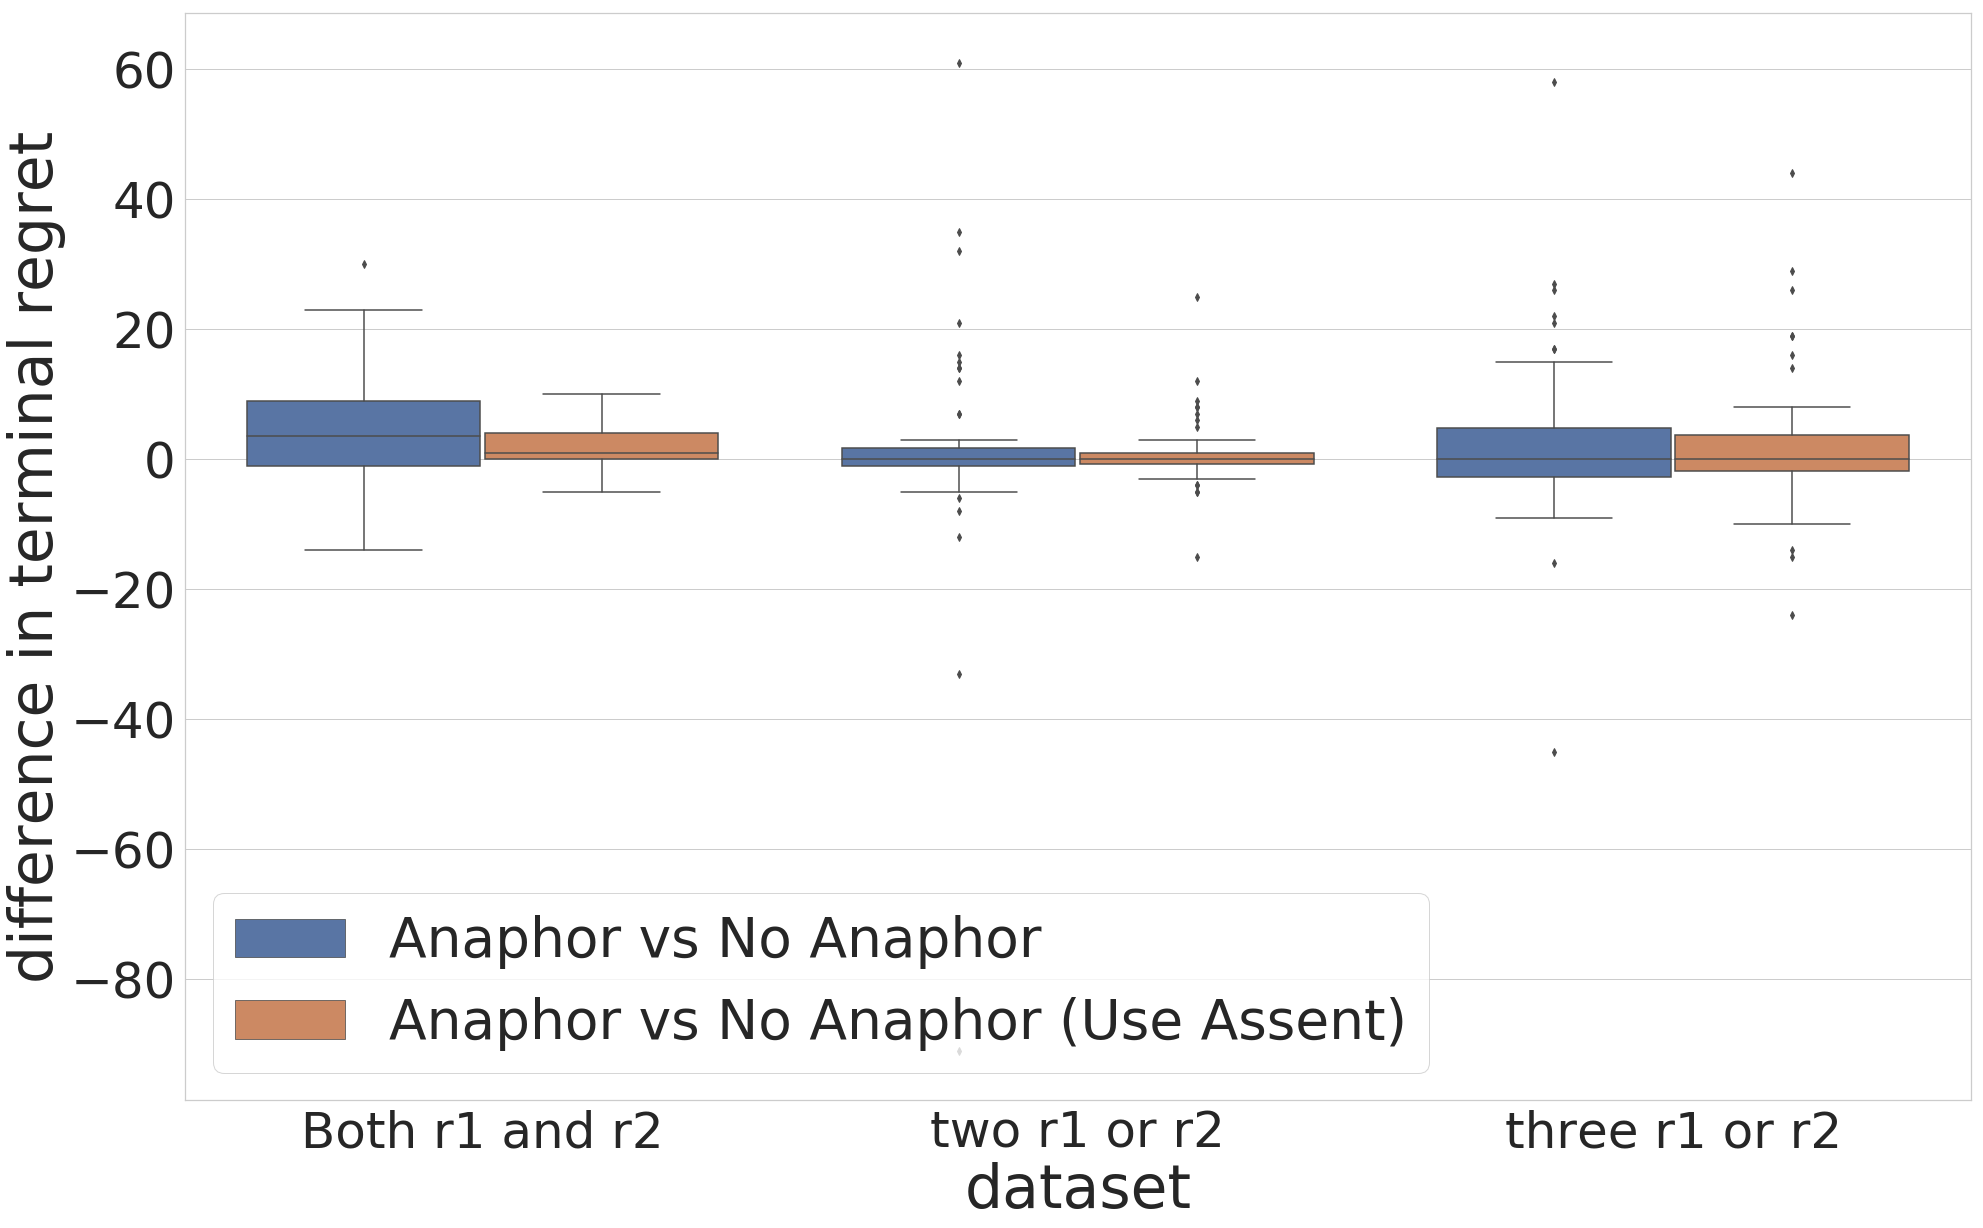

In [97]:

split_bar_chart([[361, 365], [346, 347], [348, 349]], ["Anaphor", "Anaphor"], [[363, 364], [315, 318], [339, 340]], 
                ["No Anaphor", "No Anaphor (Use Assent)"], ["Both r1 and r2", "two r1 or r2", "three r1 or r2"], fname='boxplot3.png')

(50,)
(50,)
(50,)
(50,)


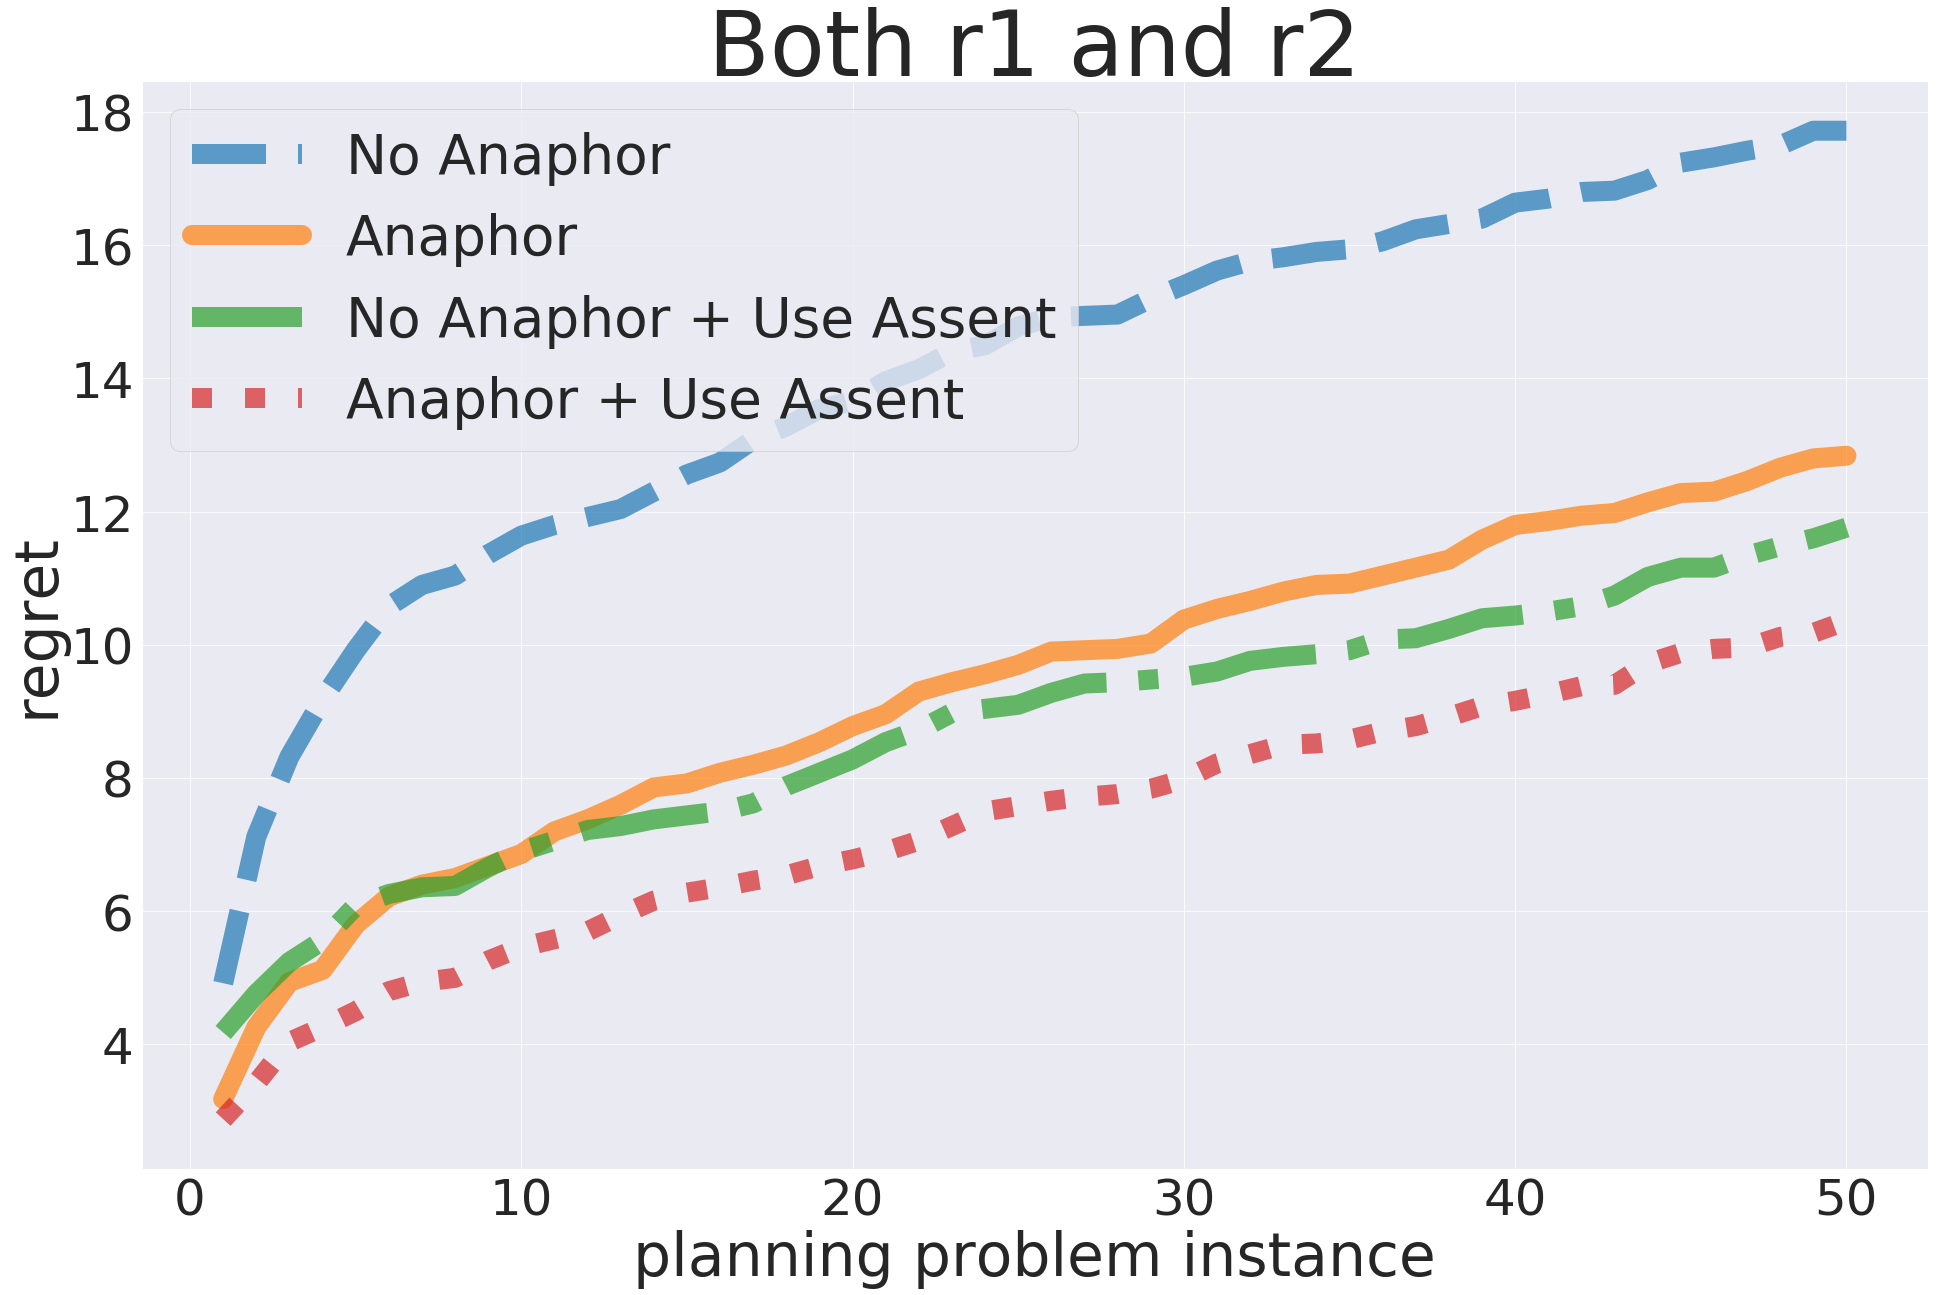

In [8]:
font_legend = 55
title_font = 90
label_font = 60
ax_font = 50


plt.figure(figsize=(32, 20))
plt.tick_params(axis = 'both', which = 'major', labelsize = ax_font)

plot_big_experiments_w_errorbars(
    [363, 361, 364, 365], 
    ['No Anaphor', 'Anaphor', 'No Anaphor + Use Assent', 'Anaphor + Use Assent'], 
    fname='experiment3.png')

plt.ylabel('regret', fontsize=label_font)
plt.xlabel('planning problem instance', fontsize=label_font)

plt.title('Both r1 and r2', fontsize=title_font)
plt.legend(fontsize=font_legend, loc='upper left')
plt.savefig('experiment3.4.png')

In [59]:
do_ttest_rel_big([363, 364],[361, 365])

Min for a: 4.0 Max for a: 36.0
Min for b: 3.0 Max for b: 40.0
p= Ttest_relResult(statistic=4.572776349782279, pvalue=1.3944302866753558e-05) mean a: 14.74 mean b: 11.6


([16.0,
  24.0,
  25.0,
  19.0,
  10.0,
  26.0,
  22.0,
  11.0,
  17.0,
  27.0,
  8.0,
  22.0,
  13.0,
  14.0,
  19.0,
  28.0,
  14.0,
  16.0,
  7.0,
  7.0,
  15.0,
  17.0,
  26.0,
  7.0,
  9.0,
  26.0,
  34.0,
  12.0,
  14.0,
  21.0,
  10.0,
  30.0,
  10.0,
  19.0,
  15.0,
  14.0,
  10.0,
  26.0,
  10.0,
  6.0,
  27.0,
  6.0,
  12.0,
  21.0,
  36.0,
  23.0,
  15.0,
  21.0,
  14.0,
  35.0,
  13.0,
  14.0,
  21.0,
  14.0,
  8.0,
  16.0,
  10.0,
  8.0,
  17.0,
  19.0,
  8.0,
  12.0,
  9.0,
  9.0,
  17.0,
  12.0,
  12.0,
  12.0,
  9.0,
  9.0,
  11.0,
  12.0,
  9.0,
  4.0,
  8.0,
  11.0,
  6.0,
  16.0,
  16.0,
  6.0,
  10.0,
  19.0,
  6.0,
  17.0,
  11.0,
  14.0,
  8.0,
  9.0,
  6.0,
  8.0,
  18.0,
  4.0,
  24.0,
  12.0,
  18.0,
  8.0,
  12.0,
  12.0,
  15.0,
  9.0],
 [18.0,
  17.0,
  28.0,
  16.0,
  11.0,
  40.0,
  13.0,
  9.0,
  11.0,
  8.0,
  10.0,
  16.0,
  11.0,
  13.0,
  15.0,
  29.0,
  12.0,
  8.0,
  8.0,
  9.0,
  14.0,
  8.0,
  11.0,
  13.0,
  12.0,
  14.0,
  13.0,
  11.0,
  8.0,
 

simple vs simple + anaphor
Min for a: 6.0 Max for a: 36.0
Min for b: 4.0 Max for b: 40.0
p= Ttest_relResult(statistic=3.9469417632258836, pvalue=0.0002526001199881727) mean a: 17.72 mean b: 12.84
full vs full + anaphor
Min for a: 4.0 Max for a: 24.0
Min for b: 3.0 Max for b: 24.0
p= Ttest_relResult(statistic=2.783012987810618, pvalue=0.007628594269910338) mean a: 11.76 mean b: 10.36


(array([13., 14., 21., 14.,  8., 16., 10.,  8., 17., 19.,  8., 12.,  9.,
         9., 17., 12., 12., 12.,  9.,  9., 11., 12.,  9.,  4.,  8., 11.,
         6., 16., 16.,  6., 10., 19.,  6., 17., 11., 14.,  8.,  9.,  6.,
         8., 18.,  4., 24., 12., 18.,  8., 12., 12., 15.,  9.]),
 array([10., 10., 24., 19., 11., 16.,  9., 10.,  9., 16.,  7., 14.,  9.,
        13.,  7., 10.,  8., 12.,  5.,  9., 11.,  7.,  4.,  4.,  6.,  4.,
         5., 10., 12.,  6.,  9., 15.,  8.,  7., 12.,  8.,  7., 14.,  5.,
         8., 18.,  3., 24., 13., 17.,  5., 12., 17.,  9., 10.]))

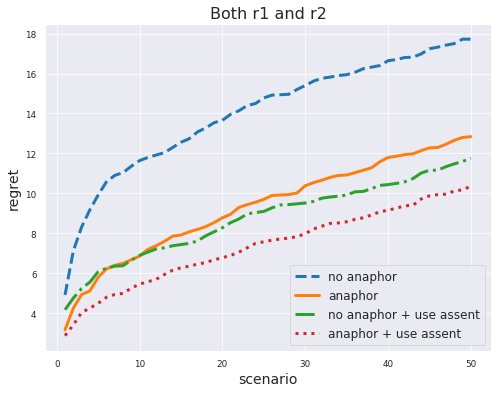

In [51]:
plt.figure(figsize=(8, 6))
experiment_tracking.plot_big_experiments(
    [363, 361, 364, 365], 
    ['no anaphor', 'anaphor', 'no anaphor + use assent', 'anaphor + use assent'], 
    fname='experiment3.png')
font_legend = 16
title_font = 16
label_font = 14
ax_font = 13
plt.ylabel('regret', fontsize=label_font)
plt.xlabel('scenario', fontsize=label_font)
plt.title('Both r1 and r2', fontsize=title_font)
plt.savefig('experiment3.4.png')
print('simple vs simple + anaphor')
experiment_tracking.do_ttest_rel(363, 361)
print('full vs full + anaphor')
experiment_tracking.do_ttest_rel(364, 365)

In [38]:
def do_ttest_rel_big(the_as, the_bs):
    total_a = []
    total_b = []
    for a, b in zip(the_as, the_bs):
        total_a.extend(experiment_tracking.get_cumsum(a)[:, -1])
        total_b.extend(experiment_tracking.get_cumsum(b)[:, -1])
    print("Min for a:", np.min(total_a), "Max for a:", np.max(total_a))
    print("Min for b:", np.min(total_b), "Max for b:", np.max(total_b))

    print("p=", experiment_tracking.ttest_rel(total_a, total_b), f"mean a: {np.mean(total_a)}", f"mean b: {np.mean(total_b)}")
    return total_a, total_b

In [39]:
do_ttest_rel_big([315, 318, 339, 340, 352, 350], [346, 347, 348, 349, 354, 351])

Min for a: 8.0 Max for a: 203.0
Min for b: 8.0 Max for b: 138.0
p= Ttest_relResult(statistic=2.4080829360890084, pvalue=0.016641746765524497) mean a: 37.91 mean b: 35.32


([19.0,
  22.0,
  15.0,
  15.0,
  49.0,
  36.0,
  21.0,
  17.0,
  40.0,
  18.0,
  21.0,
  28.0,
  18.0,
  16.0,
  24.0,
  19.0,
  58.0,
  11.0,
  28.0,
  19.0,
  29.0,
  39.0,
  16.0,
  19.0,
  11.0,
  38.0,
  43.0,
  15.0,
  12.0,
  15.0,
  22.0,
  31.0,
  16.0,
  33.0,
  18.0,
  14.0,
  24.0,
  23.0,
  14.0,
  12.0,
  9.0,
  17.0,
  16.0,
  12.0,
  46.0,
  28.0,
  77.0,
  9.0,
  11.0,
  21.0,
  21.0,
  19.0,
  16.0,
  14.0,
  32.0,
  15.0,
  18.0,
  14.0,
  24.0,
  30.0,
  18.0,
  12.0,
  12.0,
  16.0,
  20.0,
  19.0,
  15.0,
  11.0,
  16.0,
  13.0,
  12.0,
  18.0,
  8.0,
  20.0,
  14.0,
  14.0,
  10.0,
  8.0,
  12.0,
  28.0,
  17.0,
  15.0,
  10.0,
  34.0,
  19.0,
  14.0,
  14.0,
  19.0,
  13.0,
  11.0,
  11.0,
  13.0,
  9.0,
  18.0,
  21.0,
  21.0,
  16.0,
  9.0,
  14.0,
  20.0,
  27.0,
  26.0,
  66.0,
  60.0,
  21.0,
  22.0,
  69.0,
  13.0,
  17.0,
  48.0,
  48.0,
  31.0,
  53.0,
  28.0,
  43.0,
  32.0,
  42.0,
  37.0,
  25.0,
  20.0,
  48.0,
  24.0,
  41.0,
  48.0,
  33.0,
  35.0

simple vs simple + anaphor
Min for a: 9.0 Max for a: 77.0
Min for b: 9.0 Max for b: 106.0
p= Ttest_relResult(statistic=0.5066316459503584, pvalue=0.6146855638429027) mean a: 23.68 mean b: 22.34
full vs full + anaphor
Min for a: 8.0 Max for a: 34.0
Min for b: 8.0 Max for b: 33.0
p= Ttest_relResult(statistic=1.186990179782865, pvalue=0.2409543710372121) mean a: 16.34 mean b: 15.44


(array([21., 19., 16., 14., 32., 15., 18., 14., 24., 30., 18., 12., 12.,
        16., 20., 19., 15., 11., 16., 13., 12., 18.,  8., 20., 14., 14.,
        10.,  8., 12., 28., 17., 15., 10., 34., 19., 14., 14., 19., 13.,
        11., 11., 13.,  9., 18., 21., 21., 16.,  9., 14., 20.]),
 array([ 9., 23., 14., 15., 23., 14., 19., 14., 27., 30., 13., 12., 12.,
        21., 25., 20., 15., 11., 16., 13., 12., 33.,  8., 20., 11., 14.,
        10., 11., 11., 21., 19., 13., 10.,  9., 19., 14., 13., 23., 13.,
        11., 12., 13.,  9., 10., 21., 13., 18.,  9., 12., 14.]))

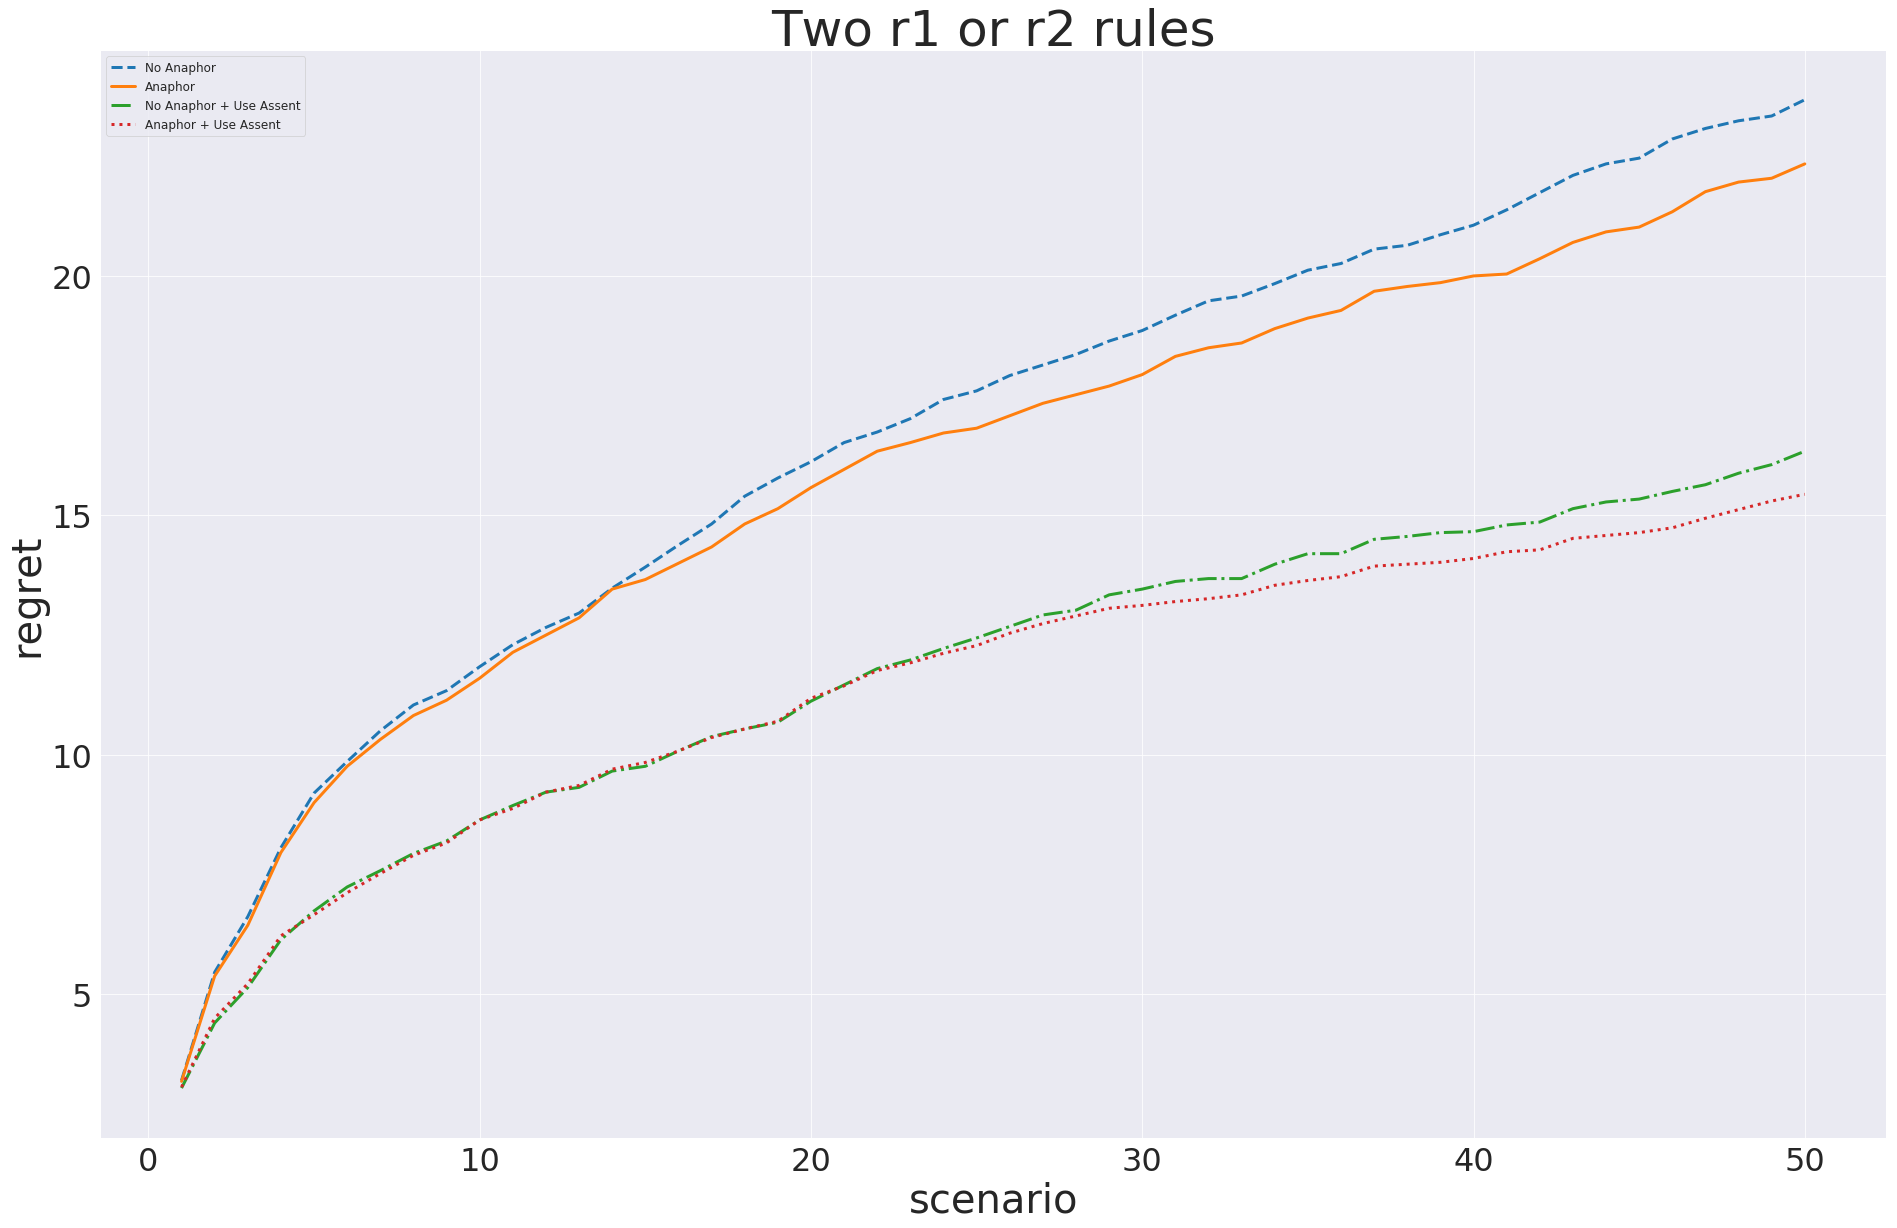

In [74]:
font_legend = 16
title_font = 16
label_font = 14
ax_font = 13
experiment_tracking.plot_big_experiments([315, 346, 318, 347], 
        ['No Anaphor', 'Anaphor', 'No Anaphor + Use Assent', 'Anaphor + Use Assent'], fname='experiment3.png')
plt.ylabel('regret', fontsize=label_font)
plt.xlabel('scenario', fontsize=label_font)
plt.title('Two r1 or r2 rules', fontsize=title_font)
plt.savefig('experiment3.1.png')
print('simple vs simple + anaphor')
experiment_tracking.do_ttest_rel(315, 346)
print('full vs full + anaphor')
experiment_tracking.do_ttest_rel(318, 347)

(50,)
(50,)
(50,)
(50,)


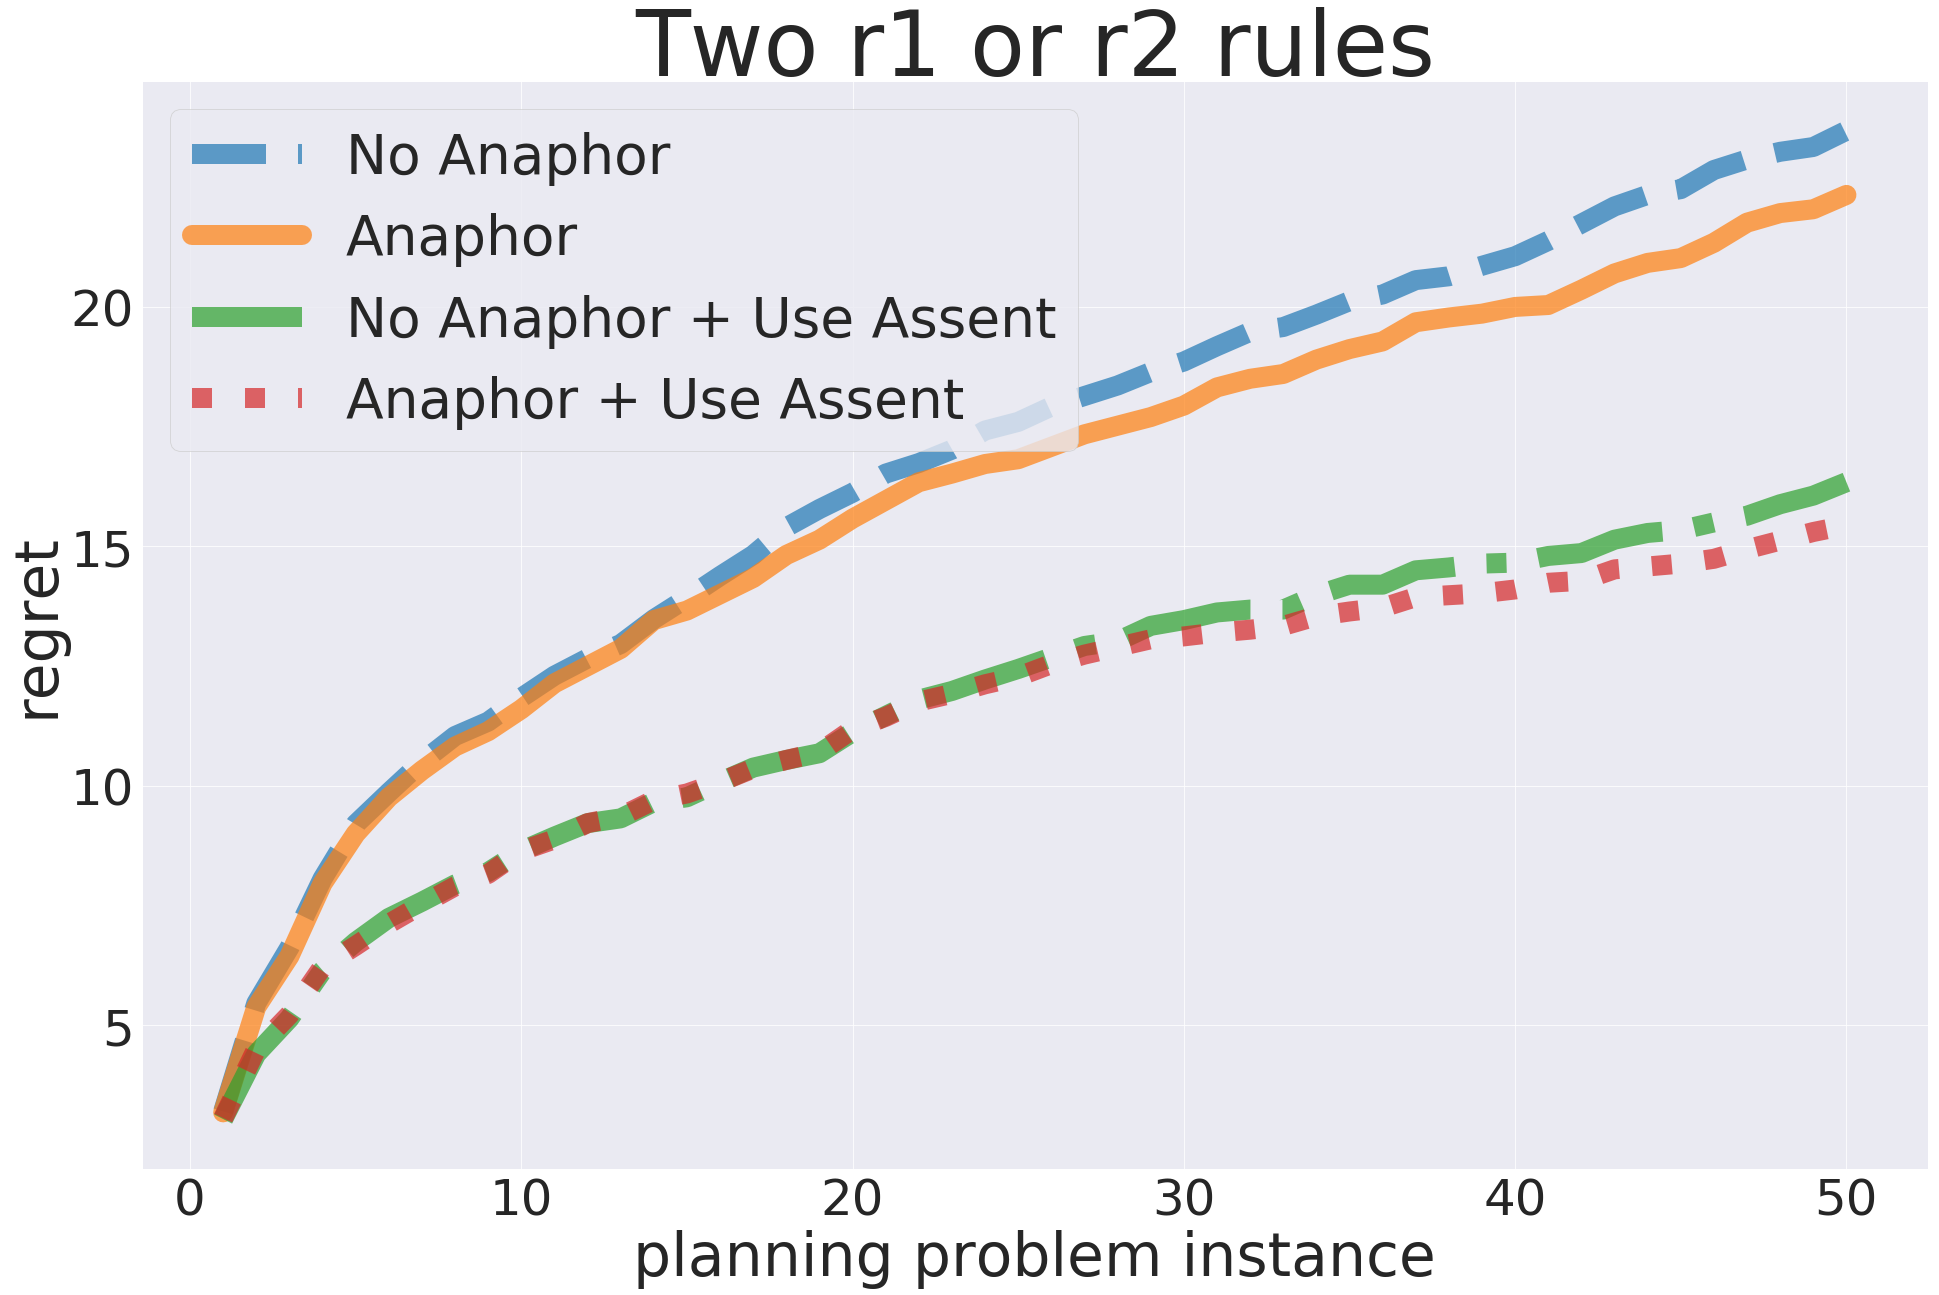

In [9]:
font_legend = 55
title_font = 90
label_font = 60
ax_font = 50

plt.figure(figsize=(32, 20))
plt.tick_params(axis = 'both', which = 'major', labelsize = ax_font)

plot_big_experiments_w_errorbars([315, 346, 318, 347], 
        ['No Anaphor', 'Anaphor', 'No Anaphor + Use Assent', 'Anaphor + Use Assent'], fname='experiment3.png')
plt.ylabel('regret', fontsize=label_font)
plt.xlabel('planning problem instance', fontsize=label_font)

plt.title('Two r1 or r2 rules', fontsize=title_font)
plt.legend(fontsize=font_legend, loc='upper left')
plt.savefig('experiment3.1.png')


simple vs simple + anaphor
Min for a: 12.0 Max for a: 106.0
Min for b: 13.0 Max for b: 93.0
p= Ttest_relResult(statistic=1.3957587090440384, pvalue=0.1690799518910444) mean a: 38.26 mean b: 35.52
full vs full + anaphor
Min for a: 10.0 Max for a: 75.0
Min for b: 10.0 Max for b: 76.0
p= Ttest_relResult(statistic=1.488127584522635, pvalue=0.1431251000797681) mean a: 29.0 mean b: 26.7


(array([18., 16., 22., 63., 18., 15., 52., 22., 17., 17., 23., 18., 21.,
        22., 29., 18., 36., 75., 19., 22., 17., 16., 25., 47., 23., 56.,
        24., 22., 35., 32., 20., 37., 21., 40., 24., 30., 44., 30., 32.,
        34., 44., 35., 38., 29., 20., 49., 10., 29., 16., 28.]),
 array([18., 31., 22., 37., 17., 17., 76., 24., 17., 16., 25., 18., 19.,
        22., 29., 18., 31., 31., 19., 29., 15., 16., 24., 28., 20., 27.,
        27., 19., 31., 18., 21., 45., 19., 21., 28., 29., 44., 33., 28.,
        48., 28., 27., 48., 28., 20., 45., 10., 34., 16., 22.]))

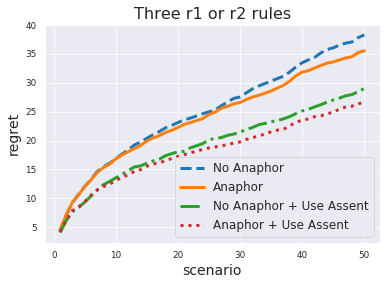

In [16]:
experiment_tracking.plot_big_experiments([339, 348, 340, 349], 
    ['No Anaphor', 'Anaphor', 'No Anaphor + Use Assent', 'Anaphor + Use Assent'], fname='experiment3.png')
font_legend = 16
title_font = 16
label_font = 14
ax_font = 13
plt.ylabel('regret', fontsize=label_font)
plt.xlabel('scenario', fontsize=label_font)
plt.title('Three r1 or r2 rules', fontsize=title_font)
plt.savefig('experiment3.2.png')
print('simple vs simple + anaphor')
experiment_tracking.do_ttest_rel(339, 348)
print('full vs full + anaphor')
experiment_tracking.do_ttest_rel(340, 349)

(50,)
(50,)
(50,)
(50,)
simple vs simple + anaphor


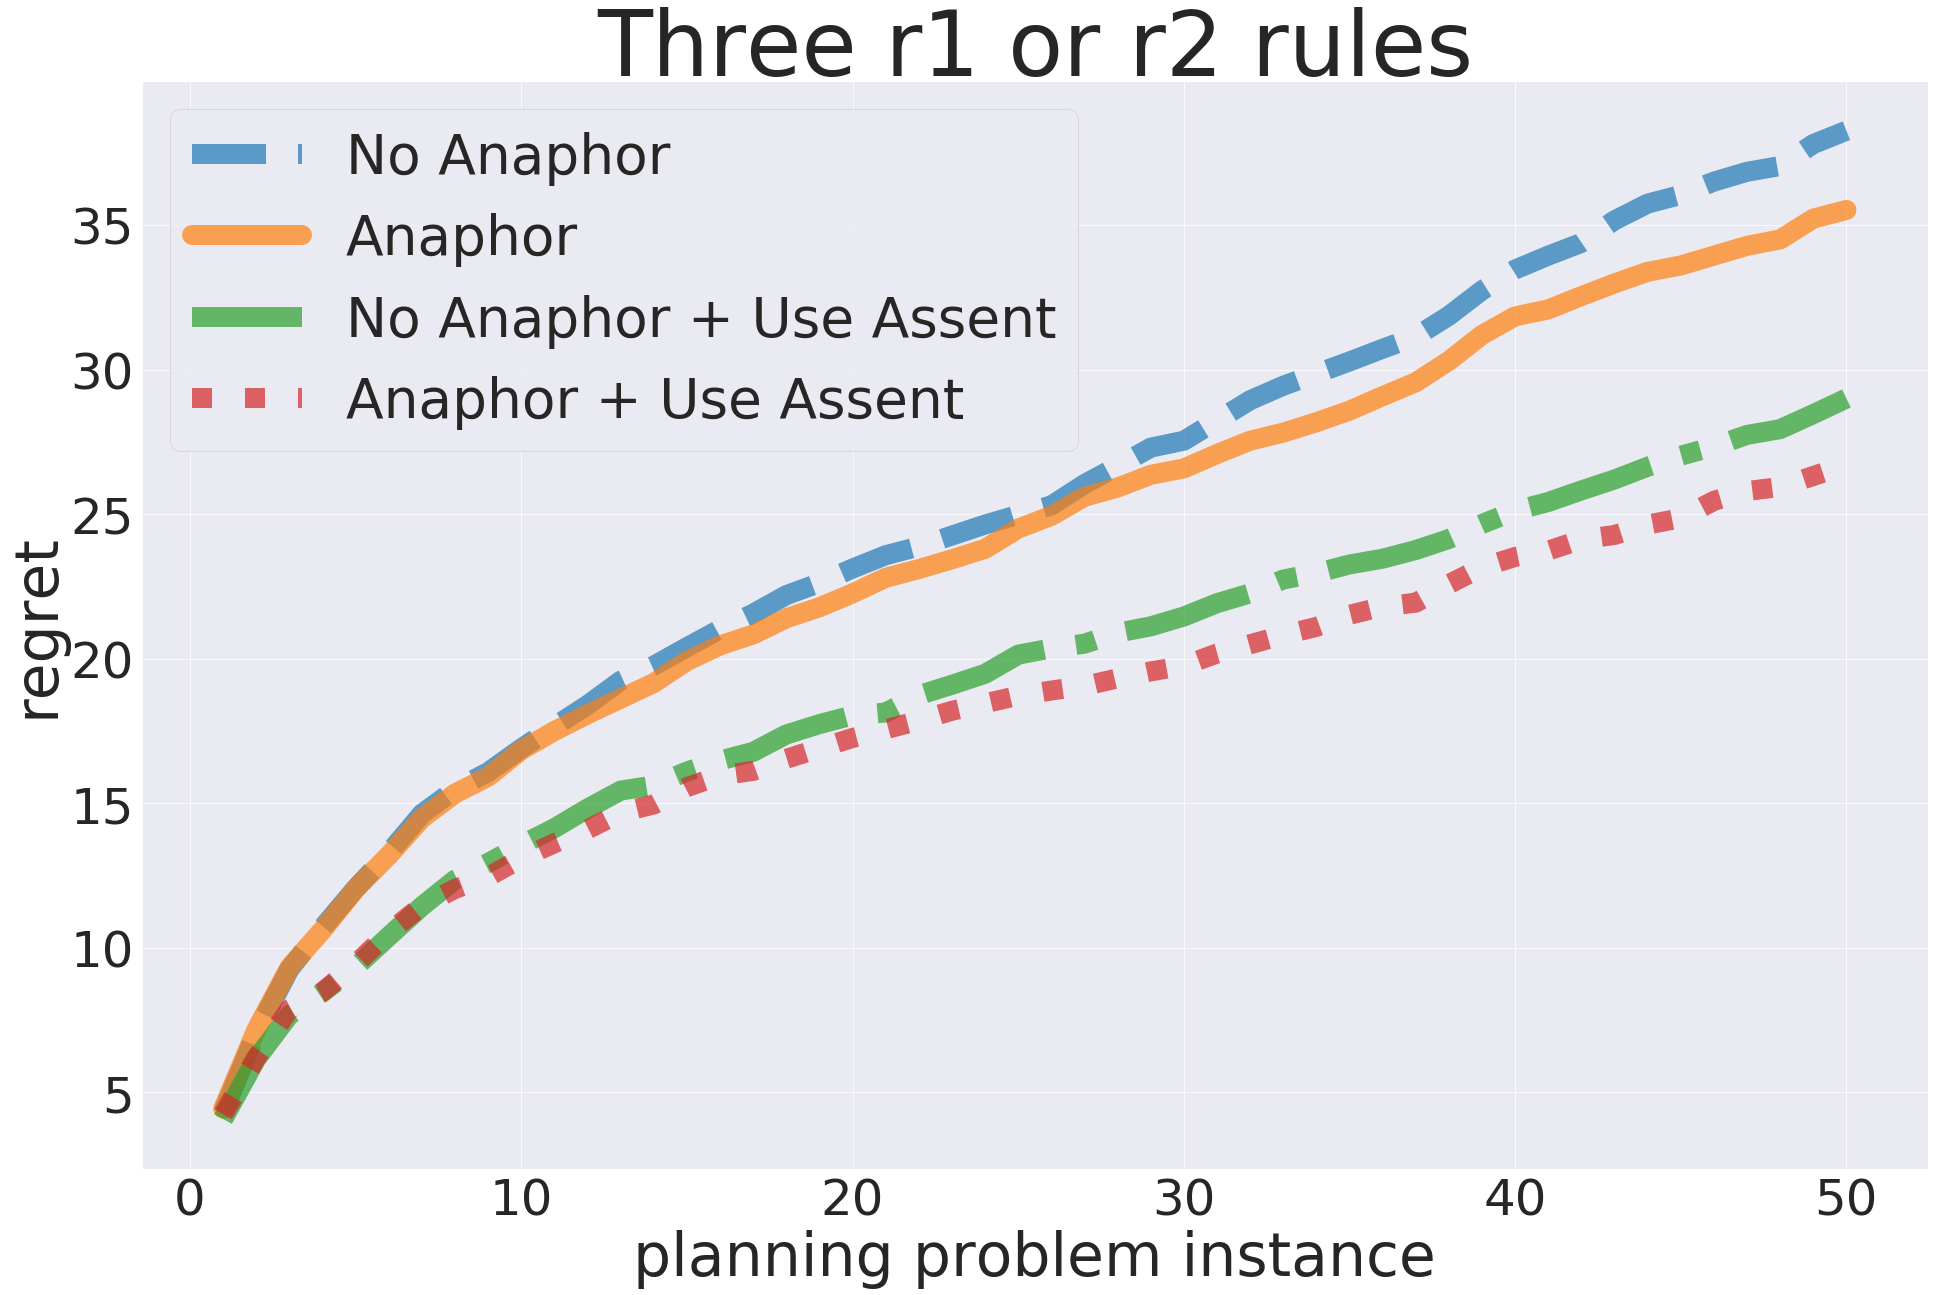

In [10]:

font_legend = 55
title_font = 90
label_font = 60
ax_font = 50

plt.figure(figsize=(32, 20))
plt.tick_params(axis = 'both', which = 'major', labelsize = ax_font)

plot_big_experiments_w_errorbars([339, 348, 340, 349], 
    ['No Anaphor', 'Anaphor', 'No Anaphor + Use Assent', 'Anaphor + Use Assent'], fname='experiment3.png')
plt.ylabel('regret', fontsize=label_font)
plt.xlabel('planning problem instance', fontsize=label_font)

plt.title('Three r1 or r2 rules', fontsize=title_font)
plt.legend(fontsize=font_legend)
plt.savefig('experiment3.2.png')
print('simple vs simple + anaphor')

simple vs simple + anaphor
Min for a: 22.0 Max for a: 164.0
Min for b: 20.0 Max for b: 138.0
p= Ttest_relResult(statistic=0.7749111296143857, pvalue=0.44211572703424795) mean a: 66.44 mean b: 63.06
full vs full + anaphor
Min for a: 19.0 Max for a: 203.0
Min for b: 19.0 Max for b: 123.0
p= Ttest_relResult(statistic=1.599994559313438, pvalue=0.11602847154025084) mean a: 53.74 mean b: 48.86


(array([ 40.,  52.,  38.,  21.,  36.,  59.,  65.,  45.,  45.,  74.,  50.,
         94.,  32., 120., 102.,  51.,  52.,  50.,  47.,  34.,  40.,  43.,
         47.,  65.,  44.,  41.,  39.,  68.,  32.,  76.,  57.,  32.,  43.,
         59.,  46.,  20., 203.,  44.,  65.,  38.,  47.,  19.,  62.,  36.,
         80.,  22.,  50.,  25.,  57.,  80.]),
 array([ 43.,  48.,  37.,  21.,  37.,  47.,  49.,  48.,  26.,  33.,  56.,
         44.,  35.,  97.,  93.,  46.,  44.,  37.,  47.,  89.,  40.,  69.,
         64.,  41.,  56.,  36.,  37.,  47.,  30.,  48.,  88.,  33.,  33.,
         44.,  31.,  20., 123.,  43.,  65.,  28.,  59.,  19.,  28.,  46.,
         47.,  45.,  51.,  24.,  90.,  81.]))

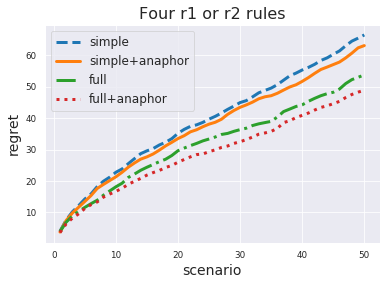

In [24]:
experiment_tracking.plot_big_experiments([352, 354, 350, 351], ['simple', 'simple+anaphor', 'full', 'full+anaphor'], fname='experiment3.png')
plt.ylabel('regret', fontsize=label_font)
plt.xlabel('scenario', fontsize=label_font)
plt.title('Four r1 or r2 rules', fontsize=title_font)
plt.savefig('experiment3.3.png')
print('simple vs simple + anaphor')
experiment_tracking.do_ttest_rel(352, 354)
print('full vs full + anaphor')
experiment_tracking.do_ttest_rel(350, 351)

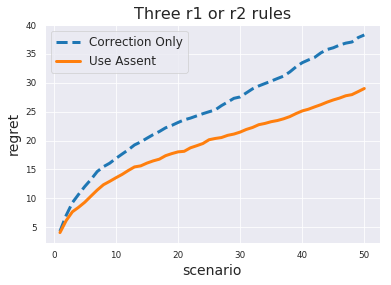

In [17]:
font_legend = 16
title_font = 16
label_font = 14
ax_font = 13
experiment_tracking.plot_big_experiments([339, 340], ['Correction Only', 'Use Assent'], fname='experiment2.2.png')
plt.ylabel('regret', fontsize=label_font)
plt.xlabel('scenario', fontsize=label_font)
plt.title('Three r1 or r2 rules', fontsize=title_font)
plt.savefig('experiment2.2.png')

In [ ]:
font_legend = 16
title_font = 16
label_font = 14
ax_font = 13
experiment_tracking.plot_big_experiments([339, 340], ['Correction Only', 'Use Assent'], fname='experiment2.2.png')
plt.ylabel('regret', fontsize=label_font)
plt.xlabel('scenario', fontsize=label_font)
plt.title('Three r1 or r2 rules', fontsize=title_font)
plt.savefig('experiment2.2.png')

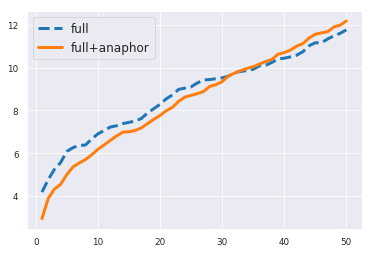

In [17]:
experiment_tracking.plot_big_experiments([337, 356], ['full', 'full+anaphor'], fname='experiment3.png')

In [8]:

print('language vs no-language')
experiment_tracking.do_ttest_rel(315, 319)
print('no-language vs naive')
experiment_tracking.do_ttest_rel(319, 234)

print('full vs simple')
experiment_tracking.do_ttest_rel(315, 318)

language vs no-language
Min for a: 9.0 Max for a: 77.0
Min for b: 40.0 Max for b: 198.0
p= Ttest_relResult(statistic=-13.944120808418115, pvalue=1.1080910300708046e-18) mean a: 23.68 mean b: 98.82
no-language vs naive
Min for a: 40.0 Max for a: 198.0
Min for b: 170.0 Max for b: 304.0
p= Ttest_relResult(statistic=-24.59034473863053, pvalue=3.192514993959403e-29) mean a: 98.82 mean b: 236.68
full vs simple
Min for a: 9.0 Max for a: 77.0
Min for b: 8.0 Max for b: 34.0
p= Ttest_relResult(statistic=3.9524901191385227, pvalue=0.0002482053136272668) mean a: 23.68 mean b: 16.34


(array([19., 22., 15., 15., 49., 36., 21., 17., 40., 18., 21., 28., 18.,
        16., 24., 19., 58., 11., 28., 19., 29., 39., 16., 19., 11., 38.,
        43., 15., 12., 15., 22., 31., 16., 33., 18., 14., 24., 23., 14.,
        12.,  9., 17., 16., 12., 46., 28., 77.,  9., 11., 21.]),
 array([21., 19., 16., 14., 32., 15., 18., 14., 24., 30., 18., 12., 12.,
        16., 20., 19., 15., 11., 16., 13., 12., 18.,  8., 20., 14., 14.,
        10.,  8., 12., 28., 17., 15., 10., 34., 19., 14., 14., 19., 13.,
        11., 11., 13.,  9., 18., 21., 21., 16.,  9., 14., 20.]))

In [6]:
experiment_tracking.do_ttest_rel(334, 333)
experiment_tracking.do_ttest_rel(333, 334)
experiment_tracking.do_ttest_rel(335, 336)
experiment_tracking.do_ttest_rel(337, 338)
experiment_tracking.do_ttest_rel(339, 340)
experiment_tracking.do_ttest_rel(341, 342)
experiment_tracking.do_ttest_rel(343, 344)

Min for a: 1.0 Max for a: 8.0
Min for b: 1.0 Max for b: 9.0
p= Ttest_relResult(statistic=4.521646942187746, pvalue=3.901271858717765e-05) mean a: 4.08 mean b: 3.34
Min for a: 1.0 Max for a: 9.0
Min for b: 1.0 Max for b: 8.0
p= Ttest_relResult(statistic=-4.521646942187746, pvalue=3.901271858717765e-05) mean a: 3.34 mean b: 4.08
Min for a: 2.0 Max for a: 6.0
Min for b: 2.0 Max for b: 11.0
p= Ttest_relResult(statistic=-8.369972479727567, pvalue=5.222334059439163e-11) mean a: 3.66 mean b: 5.28
Min for a: 2.0 Max for a: 8.0
Min for b: 2.0 Max for b: 13.0
p= Ttest_relResult(statistic=-9.701088140570166, pvalue=5.459074393325371e-13) mean a: 3.92 mean b: 6.12
Min for a: 3.0 Max for a: 13.0
Min for b: 3.0 Max for b: 15.0
p= Ttest_relResult(statistic=-7.476724446621276, pvalue=1.2155915164856302e-09) mean a: 6.28 mean b: 8.08
Min for a: 4.0 Max for a: 12.0
Min for b: 5.0 Max for b: 18.0
p= Ttest_relResult(statistic=-9.00720125809881, pvalue=5.7517920212332425e-12) mean a: 7.14 mean b: 10.32
Min

(array([ 7., 11.,  6.,  7.,  8.,  9.,  8.,  8.,  5.,  7., 13.,  6.,  8.,
         7.,  9.,  8., 10.,  9., 12.,  6.,  9.,  5.,  8.,  8.,  5.,  6.,
         6.,  9.,  6.,  7.,  6.,  9.,  6.,  9.,  8.,  8.,  7.,  7.,  9.,
        10.,  7.,  8., 10., 10.,  7.,  4.,  9.,  7.,  6.,  7.]),
 array([15., 18.,  9., 13., 14.,  9., 12.,  9., 13., 10., 11.,  8., 12.,
        11., 20., 12., 15., 12.,  9., 14., 14.,  7., 10., 10., 12., 10.,
         9.,  9., 10., 10., 11., 23., 11.,  9., 19., 11., 17., 15.,  9.,
        11.,  9., 11., 14., 14.,  9.,  9., 11.,  8.,  8., 11.]))

In [21]:
experiment_tracking.get_experiments(334)

,config_name,experiment_file,neural_config,status,stauts
index,,,,,
6017,big_bijection_random_colours/big_bijection_ran...,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw_0.05,done,running
6018,big_bijection_random_colours/big_bijection_ran...,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw_0.05,done,running


In [21]:
print("r=1 n=1")
print(experiment_tracking.get_mean(388)[-1])
print(experiment_tracking.get_mean(389)[-1])

print(np.std(experiment_tracking.get_cumsum(388)[-1]))
print(np.std(experiment_tracking.get_cumsum(389)[-1]))

print("r=1 n=2")
print(experiment_tracking.get_mean(390)[-1])
print(experiment_tracking.get_mean(391)[-1])

print(np.std(experiment_tracking.get_cumsum(390)[-1]))
print(np.std(experiment_tracking.get_cumsum(391)[-1]))

print("r=1 n=3")
print(experiment_tracking.get_mean(392)[-1])
print(experiment_tracking.get_mean(393)[-1])

print(np.std(experiment_tracking.get_cumsum(392)[-1]))
print(np.std(experiment_tracking.get_cumsum(393)[-1]))

print("r=2 n=1")
print(experiment_tracking.get_mean(394)[-1])
print(experiment_tracking.get_mean(395)[-1])

print(np.std(experiment_tracking.get_cumsum(394)[-1]))
print(np.std(experiment_tracking.get_cumsum(395)[-1]))

print("r=2 n=2")
print(experiment_tracking.get_mean(396)[-1])
print(experiment_tracking.get_mean(397)[-1])

print(np.std(experiment_tracking.get_cumsum(396)[-1]))
print(np.std(experiment_tracking.get_cumsum(397)[-1]))

print("r=2 n=3")
print(experiment_tracking.get_mean(398)[-1])
print(experiment_tracking.get_mean(399)[-1])

print(np.std(experiment_tracking.get_cumsum(398)[-1]))
print(np.std(experiment_tracking.get_cumsum(399)[-1]))

r=1 n=1
3.34
4.08
0.3815756805667783
0.7054076835419358
r=1 n=2
3.66
5.28
1.1737120600896969
0.8544003745317531
r=1 n=3
3.92
6.12
1.399428454762872
2.170345594600086
r=2 n=1
6.28
8.08
1.6737980762326141
2.411306699696246
r=2 n=2
7.14
10.32
1.218031198286809
1.7884071124886527
r=2 n=3
7.74
11.74
1.12942463227964
2.6746214685446614


In [4]:
def plot_big_experiments_w_errorbars(list_of_experiments, labels, title='', fname='default.png', axes=None,
                         show_xlabel=True, show_ylabel=True, legend_font=12, **kwargs):
    for experiment, label, marker in zip(list_of_experiments, labels,['--', '-', '-.', ':']):  #::['_', 'x', '+', '|']):
        cumsum = experiment_tracking.get_cumsum(experiment)
        mean = np.mean(cumsum, axis=0)
        std = np.std(cumsum, axis=0)
        print(mean.shape)
#         plt.plot(range(1, 51), mean)
        plt.errorbar(range(1, 51), mean, errorevery=4,
                     yerr=std, label=label, linestyle=marker, 
                     linewidth=20, alpha=0.7)  # marker=marker)
        plt.legend(fontsize=legend_font)

(50,)
(50,)


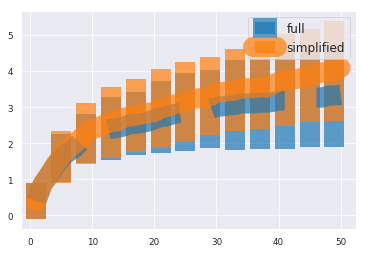

In [92]:
plot_big_experiments_w_errorbars([388, 389], labels=['full', 'simplified'])

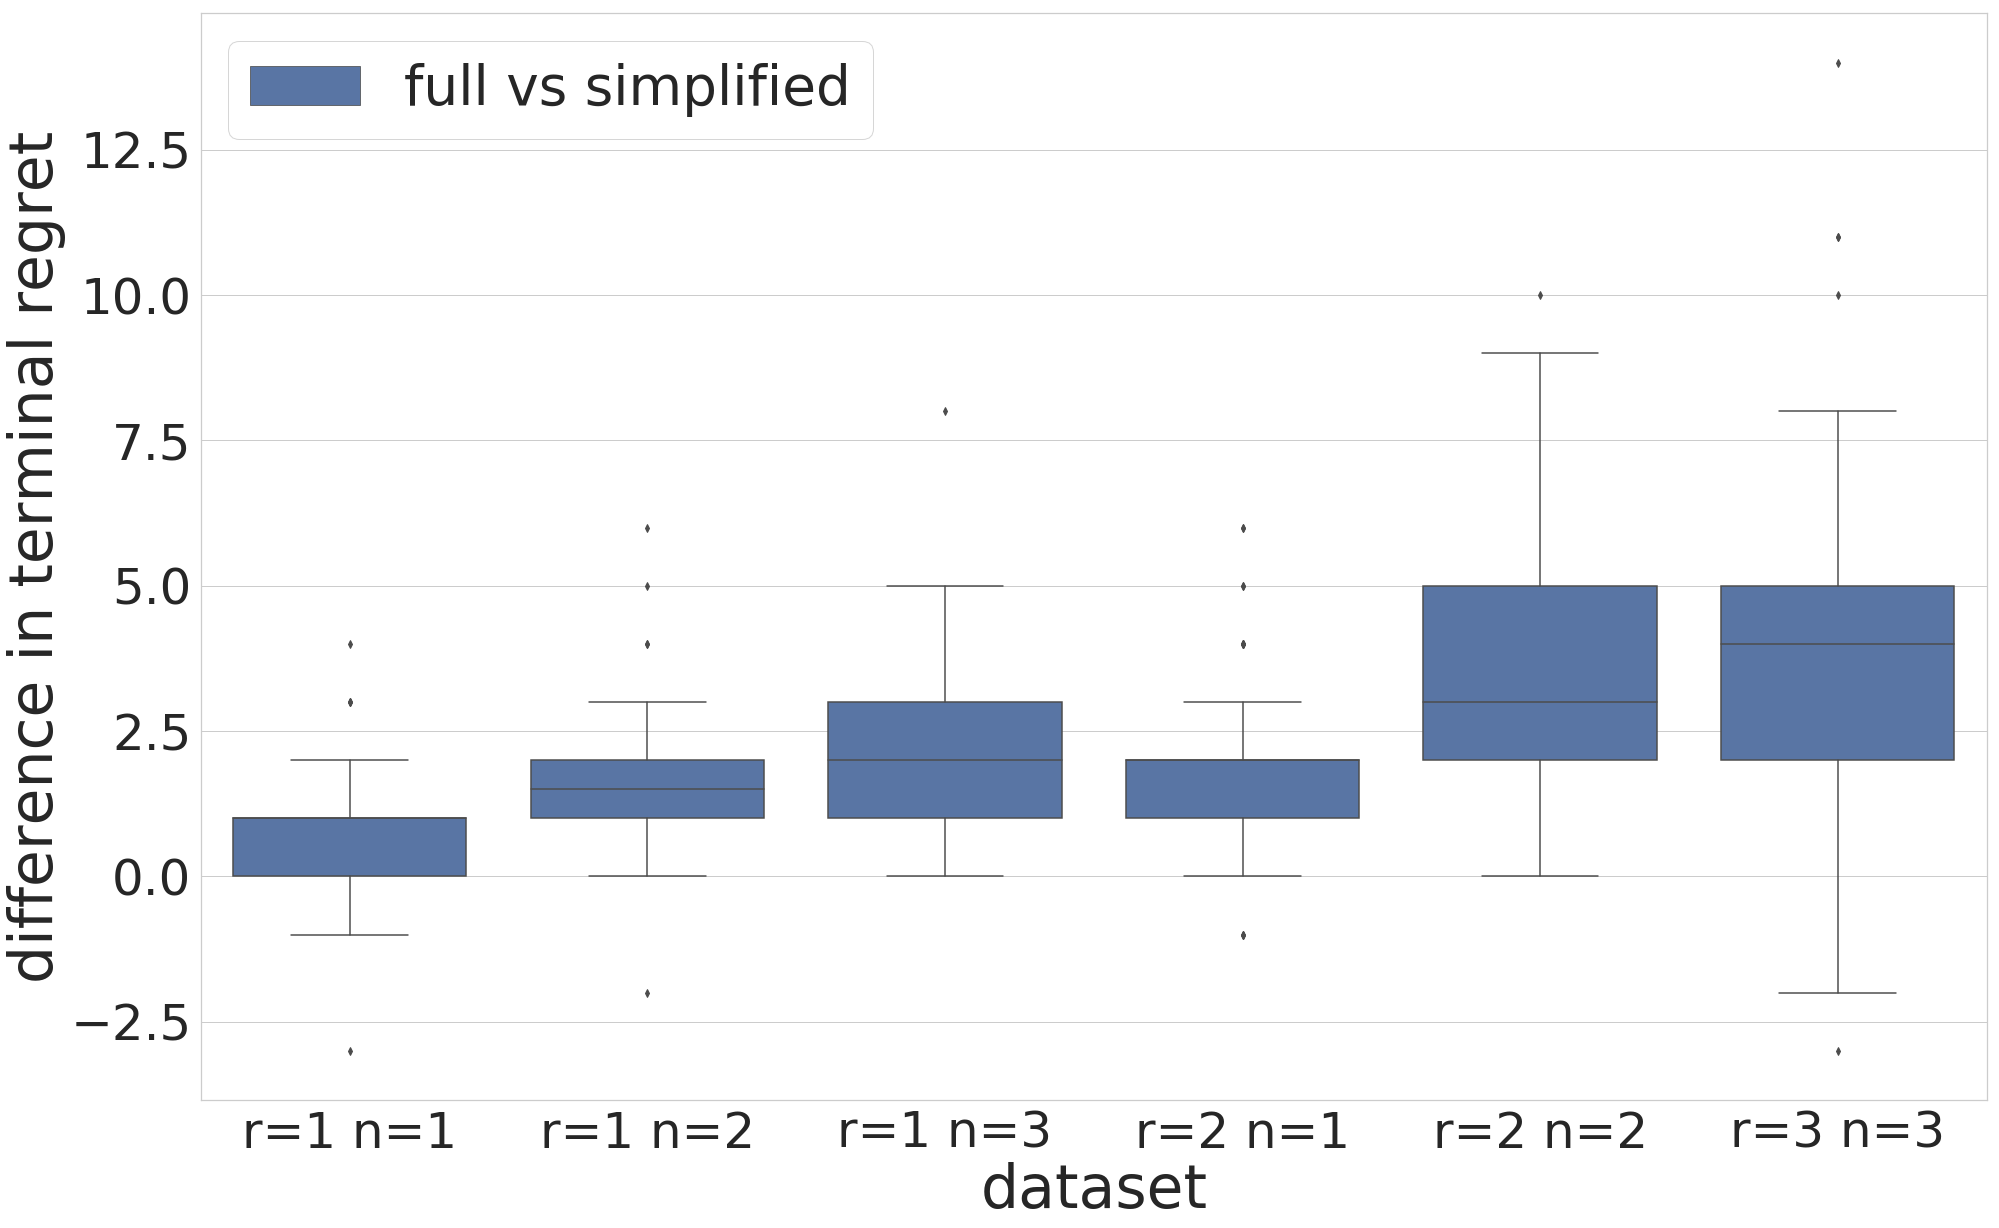

In [100]:
do_bar_chart([388, 390, 392, 394, 396, 398], "full", [[389], [391], [393], [395], [397], [399]], ["simplified"], 
             ["r=1 n=1", "r=1 n=2", "r=1 n=3", "r=2 n=1", "r=2 n=2", "r=3 n=3"], fname='boxplot4.png')

(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)


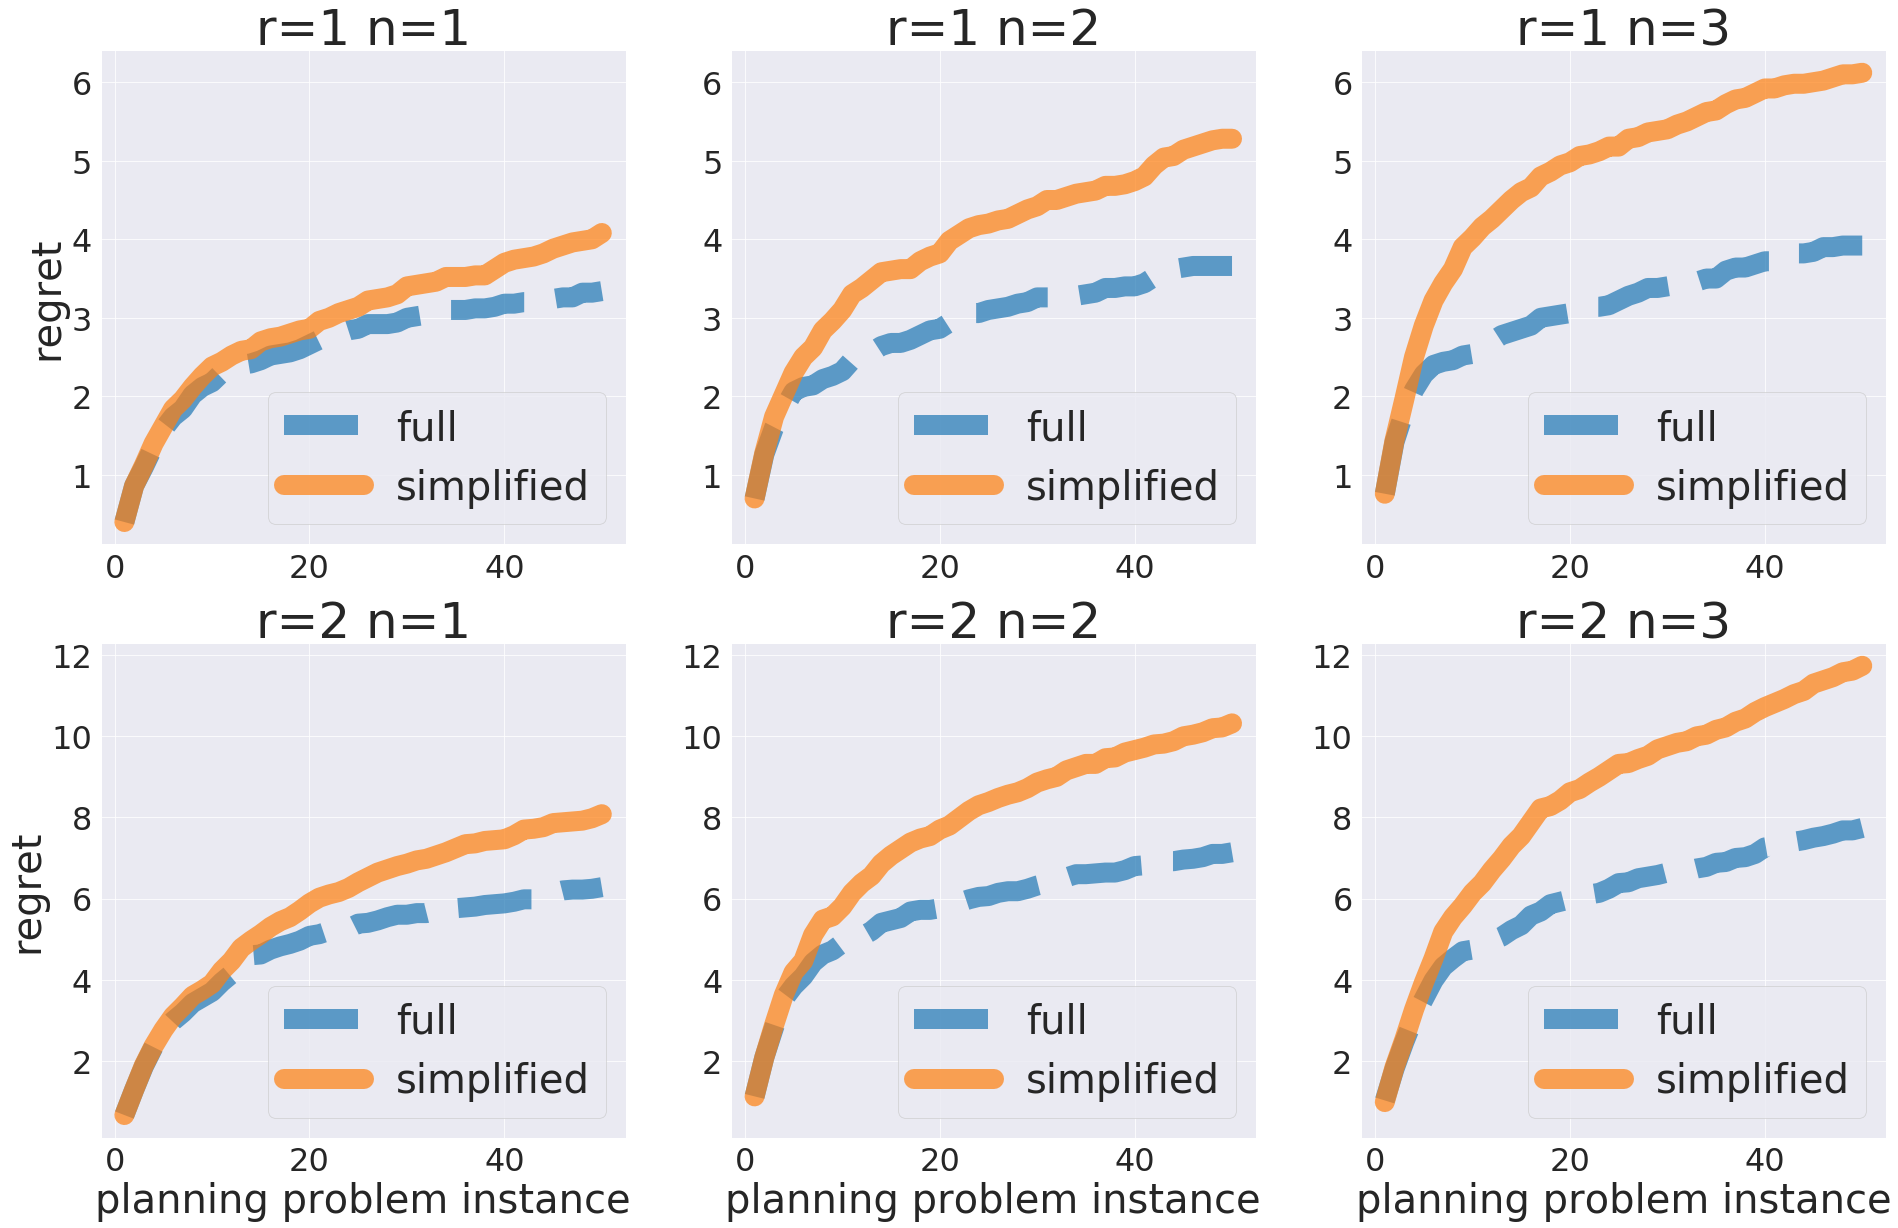

In [12]:
font_legend = 40
title_font = 50
label_font = 40
ax_font = 32

plt.figure(figsize=(32, 20))
ax1 = plt.subplot(231)
ax1.tick_params(axis = 'both', which = 'major', labelsize = ax_font)

plt.ylabel('regret', fontsize=label_font)
plt.title('r=1 n=1', fontsize=title_font)
# for experiment, label, marker in zip([333, 334], ['full', 'simplified'], ['--', '-', '-.', ':']):
#     cumsum = experiment_tracking.get_mean(experiment)
#     print(cumsum)
#     #plt.plot(range(1, 51), cumsum, label=label, linestyle=marker, linewidth=3)
#     #plt.plot(range(1, 51))
plot_big_experiments_w_errorbars([388, 389], ['full', 'simplified'], 
                                         title='r=1 n=1', fname='experiment4.1-1.png', 
                                         legend_font=font_legend)
plt.legend(loc= "lower right", fontsize=font_legend)

ax = plt.subplot(232, sharey=ax1)
ax.tick_params(axis = 'both', which = 'major', labelsize = ax_font)
plt.title('r=1 n=2', fontsize=title_font)
plot_big_experiments_w_errorbars([390, 391], ['full', 'simplified'], title='r=1 n=2', fname='experiment4.1-2.png', legend_font=font_legend)
plt.legend(loc= "lower right", fontsize=font_legend)

ax = plt.subplot(233, sharey=ax1)
ax.tick_params(axis = 'both', which = 'major', labelsize = ax_font)

plt.title('r=1 n=3', fontsize=title_font)
plot_big_experiments_w_errorbars([392, 393], ['full', 'simplified'], title='r=1 n=3', fname='experiment4.1-3.png', legend_font=font_legend)
plt.legend(loc= "lower right", fontsize=font_legend)

ax2 = plt.subplot(234)
ax2.tick_params(axis = 'both', which = 'major', labelsize = ax_font)

plt.ylabel('regret', fontsize=label_font)
plt.xlabel('planning problem instance', fontsize=label_font)

plt.title('r=2 n=1', fontsize=title_font)
plot_big_experiments_w_errorbars([394, 395], ['full', 'simplified'], title='r=2 n=1', fname='experiment4.2-1.png', legend_font=font_legend)
plt.legend(loc= "lower right", fontsize=font_legend)

ax = plt.subplot(235, sharey=ax2)
ax.tick_params(axis = 'both', which = 'major', labelsize = ax_font)

plt.xlabel('planning problem instance', fontsize=label_font)

plt.title('r=2 n=2', fontsize=title_font)
plot_big_experiments_w_errorbars([396, 397], ['full', 'simplified'], title='r=2 n=2', fname='experiment4.2-2.png', legend_font=font_legend)
plt.legend(loc= "lower right", fontsize=font_legend)

ax = plt.subplot(236, sharey=ax2)
ax.tick_params(axis = 'both', which = 'major', labelsize = ax_font)

plt.xlabel('planning problem instance', fontsize=label_font)

plt.title('r=2 n=3', fontsize=title_font)
plot_big_experiments_w_errorbars([398, 399], ['full', 'simplified'], title='r=2 n=3', fname='experiment4.2-3.png', legend_font=font_legend)
plt.legend(loc= "lower right", fontsize=font_legend)
#plt.show()
plt.savefig('experiment4.png')

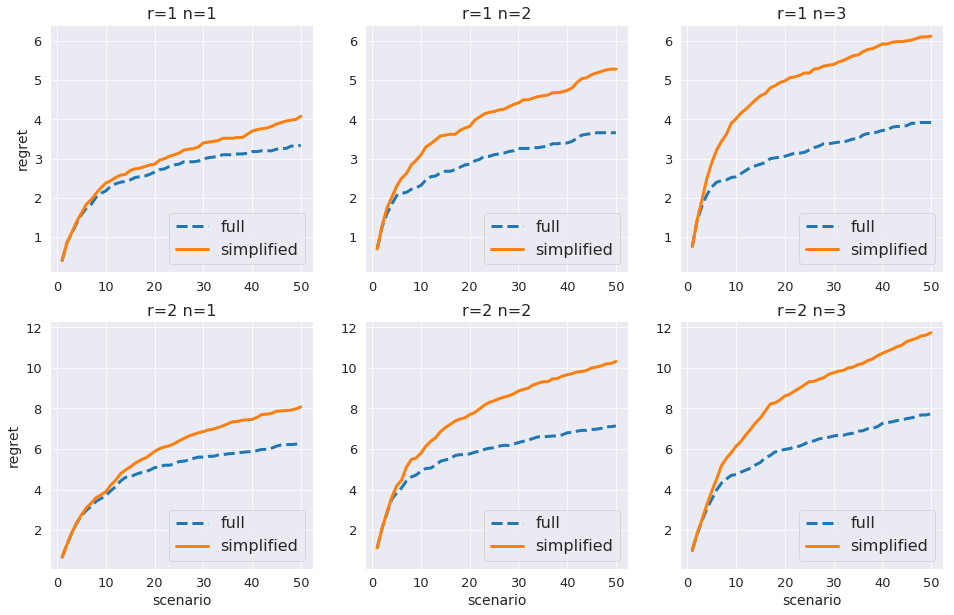

In [29]:
font_legend = 16
title_font = 16
label_font = 14
ax_font = 13

plt.figure(figsize=(16, 10))
ax1 = plt.subplot(231)
ax1.tick_params(axis = 'both', which = 'major', labelsize = ax_font)

plt.ylabel('regret', fontsize=label_font)
plt.title('r=1 n=1', fontsize=title_font)
# for experiment, label, marker in zip([333, 334], ['full', 'simplified'], ['--', '-', '-.', ':']):
#     cumsum = experiment_tracking.get_mean(experiment)
#     print(cumsum)
#     #plt.plot(range(1, 51), cumsum, label=label, linestyle=marker, linewidth=3)
#     #plt.plot(range(1, 51))
experiment_tracking.plot_big_experiments([388, 389], ['full', 'simplified'], 
                                         title='r=1 n=1', fname='experiment4.1-1.png', 
                                         legend_font=font_legend)
plt.legend(loc= "lower right", fontsize=font_legend)

ax = plt.subplot(232, sharey=ax1)
ax.tick_params(axis = 'both', which = 'major', labelsize = ax_font)
plt.title('r=1 n=2', fontsize=title_font)
experiment_tracking.plot_big_experiments([390, 391], ['full', 'simplified'], title='r=1 n=2', fname='experiment4.1-2.png', legend_font=font_legend)
plt.legend(loc= "lower right", fontsize=font_legend)

ax = plt.subplot(233, sharey=ax1)
ax.tick_params(axis = 'both', which = 'major', labelsize = ax_font)

plt.title('r=1 n=3', fontsize=title_font)
experiment_tracking.plot_big_experiments([392, 393], ['full', 'simplified'], title='r=1 n=3', fname='experiment4.1-3.png', legend_font=font_legend)
plt.legend(loc= "lower right", fontsize=font_legend)

ax2 = plt.subplot(234)
ax2.tick_params(axis = 'both', which = 'major', labelsize = ax_font)

plt.ylabel('regret', fontsize=label_font)
plt.xlabel('scenario', fontsize=label_font)
plt.title('r=2 n=1', fontsize=title_font)
experiment_tracking.plot_big_experiments([394, 395], ['full', 'simplified'], title='r=2 n=1', fname='experiment4.2-1.png', legend_font=font_legend)
plt.legend(loc= "lower right", fontsize=font_legend)

ax = plt.subplot(235, sharey=ax2)
ax.tick_params(axis = 'both', which = 'major', labelsize = ax_font)

plt.xlabel('scenario', fontsize=label_font)
plt.title('r=2 n=2', fontsize=title_font)
experiment_tracking.plot_big_experiments([396, 397], ['full', 'simplified'], title='r=2 n=2', fname='experiment4.2-2.png', legend_font=font_legend)
plt.legend(loc= "lower right", fontsize=font_legend)

ax = plt.subplot(236, sharey=ax2)
ax.tick_params(axis = 'both', which = 'major', labelsize = ax_font)

plt.xlabel('scenario', fontsize=label_font)
plt.title('r=2 n=3', fontsize=title_font)
experiment_tracking.plot_big_experiments([398, 399], ['full', 'simplified'], title='r=2 n=3', fname='experiment4.2-3.png', legend_font=font_legend)
plt.legend(loc= "lower right", fontsize=font_legend)
#plt.show()
plt.savefig('experiment4.png')

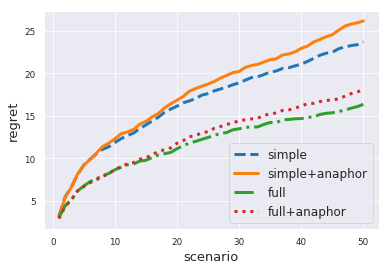

In [57]:
experiment_tracking.plot_big_experiments([315, 316, 318, 317], ['simple', 'simple+anaphor', 'full', 'full+anaphor'], fname='experiment3.png')

In [ ]:
experiment_tracking.plot_big_experiments([257, 280], ['colour_count_1_1', 'colour_count_1_1_simplified',
                                                                'colour_count_1_2', 'colour_count_1_2_simplified',
                                                               'colour_count_1_3', 'colour_count_1_3_simplified',], fname='colour_count_evidence.png')

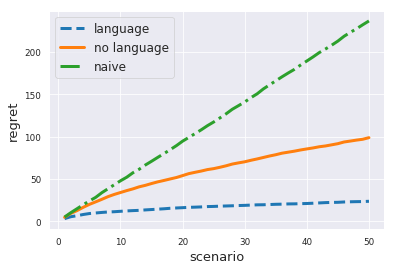

In [53]:
experiment_tracking.plot_big_experiments([315, 319, 234], ['language', 'no language', 'naive'], fname='experiment1.png')

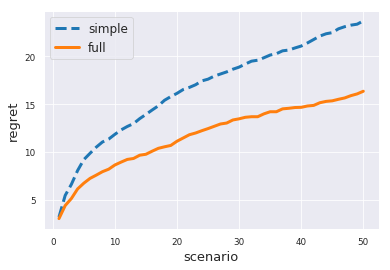

In [54]:
experiment_tracking.plot_big_experiments([315, 318], ['simple', 'full'], fname='experiment2.png')

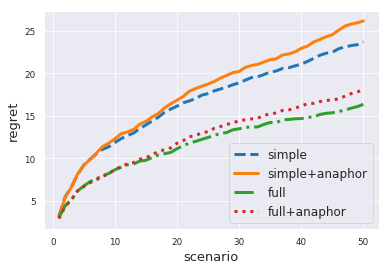

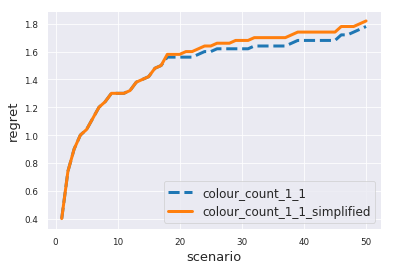

In [41]:
experiment_tracking.plot_big_experiments([257, 280], ['colour_count_1_1', 'colour_count_1_1_simplified',
                                                                'colour_count_1_2', 'colour_count_1_2_simplified',
                                                               'colour_count_1_3', 'colour_count_1_3_simplified',], fname='colour_count_evidence.png')

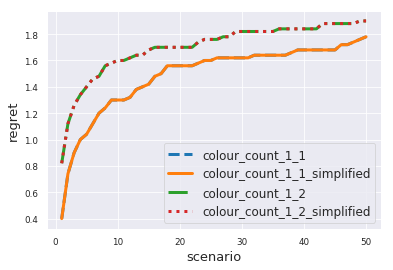

In [38]:
experiment_tracking.plot_big_experiments([257, 258, 259, 260, 261, 262], ['colour_count_1_1', 'colour_count_1_1_simplified',
                                                                'colour_count_1_2', 'colour_count_1_2_simplified',
                                                               'colour_count_1_3', 'colour_count_1_3_simplified',], fname='colour_count_evidence.png')

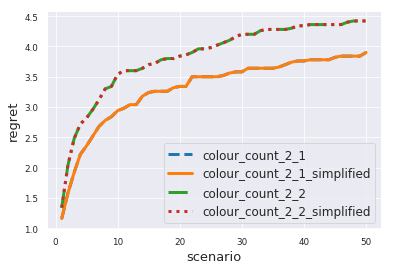

In [37]:
experiment_tracking.plot_big_experiments([267, 268, 265, 266], ['colour_count_2_1', 'colour_count_2_1_simplified',
                                                                'colour_count_2_2', 'colour_count_2_2_simplified',], fname='colour_count_evidence.png')

In [17]:
df = experiment_tracking.read_big()
df[df.status == 'done']

,experiment_name,status
index,,
33,bigthreerules_new_teacher,done
34,bigthreerules_old_teacher_no_corr,done
36,bigthreerules_new_teacher_no_corr,done
37,bigmaroon_old_teacher,done
38,bigmaroon_old_teacher_no_corr,done
39,bigmaroon_new_teacher,done
41,bigmaroon_new_teacher,done
42,bigmaroon_new_teacher_no_corr,done
45,bigmaroon_old_teacher,done


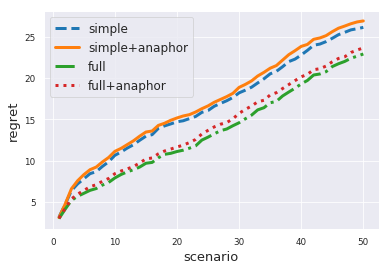

In [6]:
experiment_tracking.plot_big_experiments([202, 205, 206, 207], ['simple', 'simple+anaphor', 'full', 'full+anaphor'], fname='colour_count_redblue.png')

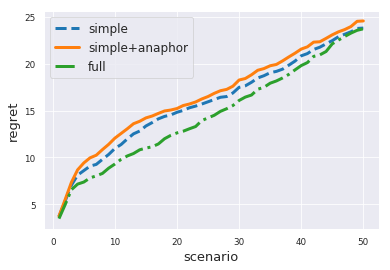

In [3]:
experiment_tracking.plot_big_experiments([190, 194, 195], ['simple', 'simple+anaphor', 'full'])

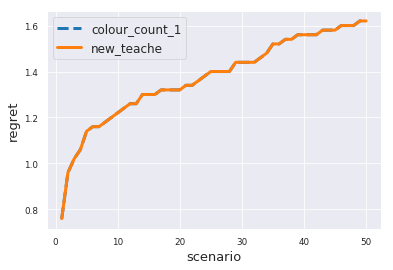

In [7]:
experiment_tracking.plot_big_experiments([161, 162], ['colour_count_1', 'new_teache'])

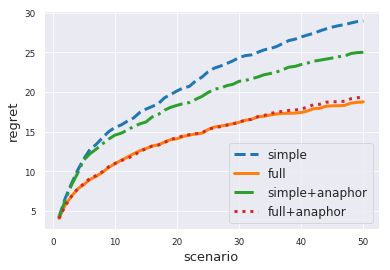

In [7]:
experiment_tracking.plot_big_experiments([52, 53, 54, 55], ['simple', 'full', 'simple+anaphor', 'full+anaphor'])

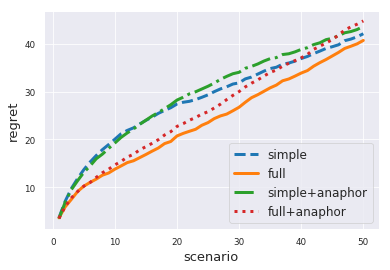

In [4]:
experiment_tracking.plot_big_experiments([208, 209, 210, 211], ['simple', 'full', 'simple+anaphor', 'full+anaphor'], fname='two_rules.png')

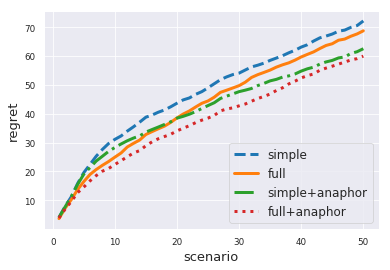

In [3]:
experiment_tracking.plot_big_experiments([76, 103, 104, 105], ['simple', 'full', 'simple+anaphor', 'full+anaphor'], fname='three_rules.png')

In [2]:
rfs = list(experiment_tracking.get_rfs(52))

In [4]:
experiments = experiment_tracking.get_experiments(52)

,config_name,experiment_file,neural_config,status
index,,,,
1337,big_tworules_random_colours/big_tworules_rando...,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw_0.05,done
1338,big_tworules_random_colours/big_tworules_rando...,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw_0.05,done
1339,big_tworules_random_colours/big_tworules_rando...,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw_0.05,done
1340,big_tworules_random_colours/big_tworules_rando...,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw_0.05,done
1341,big_tworules_random_colours/big_tworules_rando...,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw_0.05,done
1342,big_tworules_random_colours/big_tworules_rando...,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw_0.05,done
1343,big_tworules_random_colours/big_tworules_rando...,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw_0.05,done
1344,big_tworules_random_colours/big_tworules_rando...,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw_0.05,done
1345,big_tworules_random_colours/big_tworules_rando...,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw_0.05,done


In [4]:
rf1 = rfs[1]

In [13]:
_, goal, colours = rf1.load_agent()

In [14]:
goal.asPDDL()

'(and (forall (?x) (in-tower ?x)) (forall (?x) (or (not (green ?x)) (exists (?y) (and (pink ?y) (on ?x ?y))))) (forall (?x) (or (not (pink ?x)) (exists (?y) (and (yellow ?y) (on ?x ?y))))))'

In [10]:
rf1.dir_

'/home/mappelgren/Desktop/correcting-agent/results/big_tworules_random_colours/big_tworules_random_colours41/PGMAgent/0.7'

In [11]:
rf1.goal

AttributeError: 'ResultsFile' object has no attribute 'goal'